## Internet News and Consumer Engagement Analysis 
Radhika Garg
28 August 2021

## Context
This dataset ([source](https://www.kaggle.com/szymonjanowski/internet-articles-data-with-users-engagement)) consists of data about news articles collected from Sept. 3, 2019 until Nov. 4, 2019. Afterwards, it is enriched by Facebook engagement data, such as number of shares, comments and reactions. It was first created to predict the popularity of an article before it was published. 
We will go ahead and analyze the dataset begining with exploratory analysis and then dwellwing deep into NLP for sentiment and popularity prediction of articles.

## Analysis Plan
The analysis methodology followed is as follows:
1. Fetching/ loading data and Understanding the data via features nuances.
2. Data Cleaning ( Dealing with missing, ambiguous and outlier data values if any)
3. Data Preparation and Feature Engneering (for better drill down and anlysis)
4. Exploratory Data Analysis (to obtain useful insights using sweetviz, seaborn and text analytics via NLP and Vader Lexicon)
5. Developing Machine Learning Models (Preprocessig,Model building, Performance metrics, Validation)
6. Conclusion
7. Suggested Future Works

Lets start with dataset evaluation !!!

In [1]:
# Load some basic packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. Load the Data

In [2]:
# Load data from the csv file
df = pd.read_csv('news_articles.csv', index_col=0)
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 10437
Number of columns/variables: 14


,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


## Understand the variables

In [3]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
variables

var_dict = pd.read_csv('vars_description.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Values,Description
Variable,,,
source_id,13,"[reuters, the-irish-times, al-jazeera-english,...",publisher unique identifier
source_name,13,"[Reuters, The Irish Times, Al Jazeera English,...",human-readable publisher name
author,2580,"[Reuters Editorial, Eoin Burke-Kennedy, Deirdr...",article author
title,9810,[NTSB says Autopilot engaged in 2018 Californi...,article headline
description,9173,[The National Transportation Safety Board said...,article short description
url,10433,[https://www.reuters.com/article/us-tesla-cras...,article URL from publisher website
url_to_image,8363,[https://s4.reutersmedia.net/resources/r/?m=02...,url to main image associated with the article
published_at,9441,"[2019-09-03T16:22:20Z, 2019-09-03T10:32:28Z, 2...",exact time and date of publishing the article
content,8385,[WASHINGTON (Reuters) - The National Transport...,unformatted content of the article truncated t...


In [4]:
# drop the unnecesary and redundant columns from the further analysis 
# print the number of columns to ensure removal

df=df.drop(['source_name','url', 'url_to_image', 'author', 'content'], axis=1)
df.shape

(10437, 9)

Clearly, the attributes have reduced (to 9 !)

## 2. Data Cleaning

In [5]:
# fisrt step is to see the amount of missisng values if any within each attribute
df.isna().sum()

source_id                            0
title                                2
description                         24
published_at                         1
top_article                          2
engagement_reaction_count          118
engagement_comment_count           118
engagement_share_count             118
engagement_comment_plugin_count    118
dtype: int64

It is strange to observe that the engagemnet metrics have equal missing values !! Let's see how they are spread.

     |████████████████████████████████| 10.3 MB 39.5 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 58.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.8 MB 63.5 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 74.0 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 101.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 58.1 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 71.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 73.9 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 76.4 MB/s eta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
tensorflow 2.4.1 requires six~=1.15.0, bu

<AxesSubplot:>

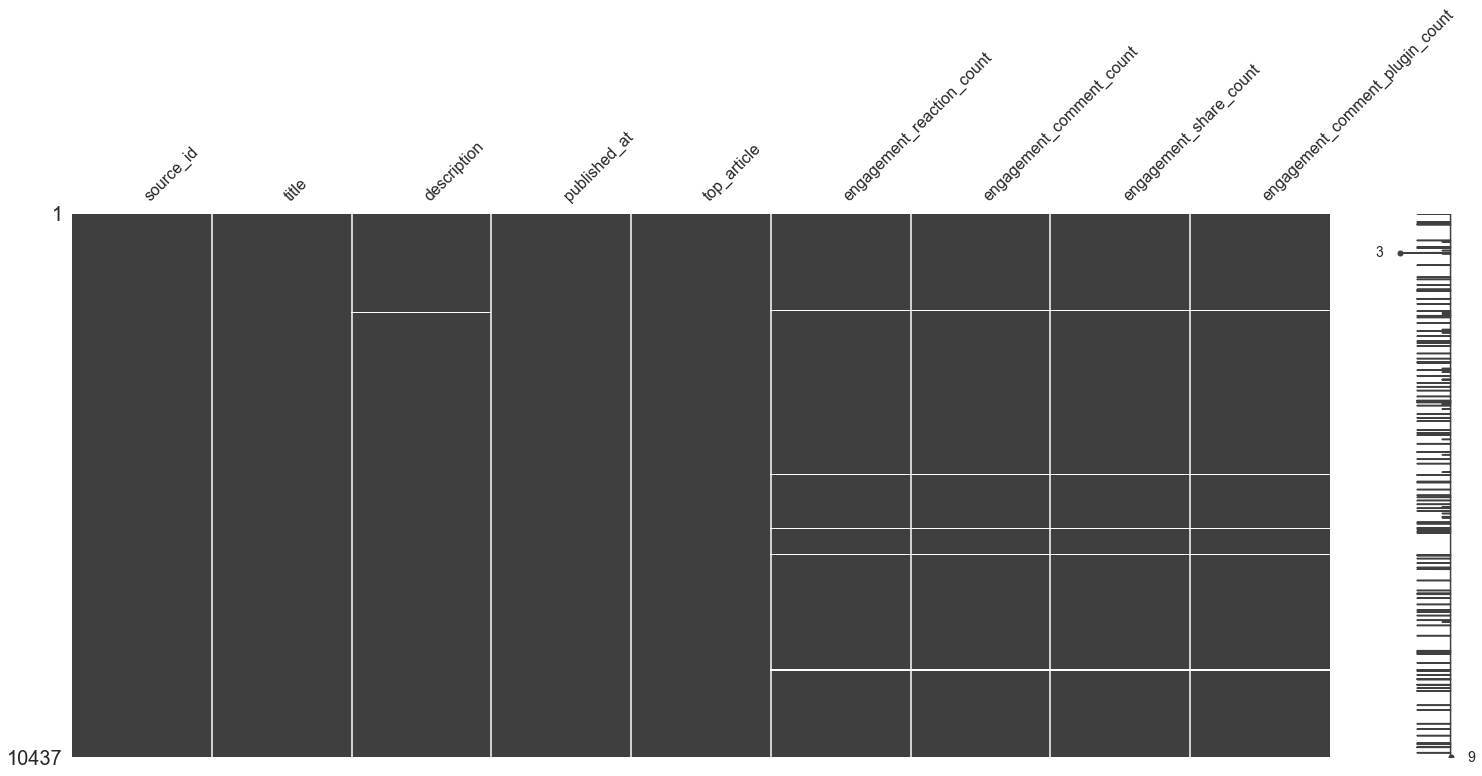

In [6]:
# Now we can also visualize the magnitude of missing values using missingno matrix
! pip install missingno
import missingno as msno
msno.matrix(df)

In [7]:
# lets check if enagement metrics are missing for common records
missing=df[(df['engagement_reaction_count'].isna()) & (df['engagement_comment_count'].isna()) & (df['engagement_share_count'].isna()) & (df['engagement_comment_plugin_count'].isna())]
missing.shape

(118, 9)

We can infer indeed the metrics are missing for same set of records that is 118!!

In [8]:
# drop these rows in the next step as these data values will not add to any insight derivation due to too much missing values
# across the record.
df=df.drop(missing.index,axis=0)
print(df.isna().sum())

source_id                           0
title                               2
description                        24
published_at                        0
top_article                         0
engagement_reaction_count           0
engagement_comment_count            0
engagement_share_count              0
engagement_comment_plugin_count     0
dtype: int64


Quit cleaned with just few operations.

## 3. Data Preparation and Feature Engineering

In [9]:
# check datatypes of your attributes to ensure there is no descripancy as stated by 
# the variable explanation
df.dtypes

source_id                           object
title                               object
description                         object
published_at                        object
top_article                        float64
engagement_reaction_count          float64
engagement_comment_count           float64
engagement_share_count             float64
engagement_comment_plugin_count    float64
dtype: object

In [10]:
# make suitable typecastings for attributes

df['title']=df['title'].astype(str)
df['description']=df['description'].astype(str)
df['top_article']=df['top_article'].astype(int)
df['engagement_reaction_count']=df['engagement_reaction_count'].astype(int)
df['engagement_comment_count']=df['engagement_comment_count'].astype(int)
df['engagement_share_count']=df['engagement_share_count'].astype(int)
df['engagement_comment_plugin_count']=df['engagement_comment_plugin_count'].astype(int)

In [11]:
# The published_at attribute can be disaggregated into month, day and hour for better insight building
# Exctract month and create a dedicated column for month, day and hour and then remove the published at column

df['Month'] = pd.DatetimeIndex(df['published_at']).month
df['Day'] = pd.DatetimeIndex(df['published_at']).day
df['Hour'] = pd.DatetimeIndex(df['published_at']).hour
df=df.drop(['published_at'], axis=1)
df.head()

,source_id,title,description,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,Month,Day,Hour
0,reuters,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,0,0,0,2528,0,9,3,16
1,the-irish-times,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,0,6,10,2,0,9,3,10
3,al-jazeera-english,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,0,0,0,7,0,9,3,17
4,bbc-news,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",0,0,0,0,0,9,3,14
5,abc-news,'This Tender Land' is an affecting story about...,"""This Tender Land"" by William Kent Krueger is ...",0,0,0,0,0,9,3,15


## 4. Exploratory Data Analysis 

     |████████████████████████████████| 15.1 MB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 98.3 MB/s eta 0:00:01
  Using cached pandas-1.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached numpy-1.21.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.8 MB)
  Using cached matplotlib-3.4.3-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
     |████████████████████████████████| 76 kB 8.7 MB/s  eta 0:00:01
  Using cached scipy-1.7.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached Pillow-8.3.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (3.0 MB)
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached

                                             |          | [  0%]   00:00 -> (? left)


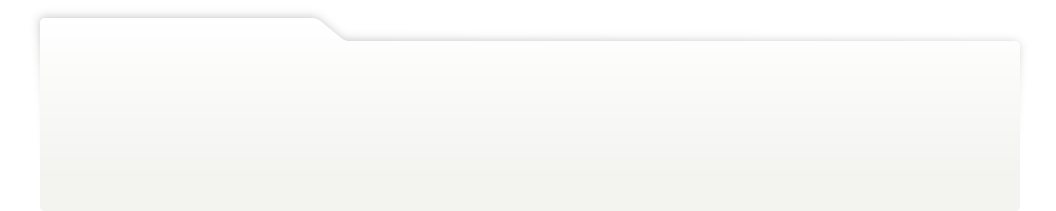
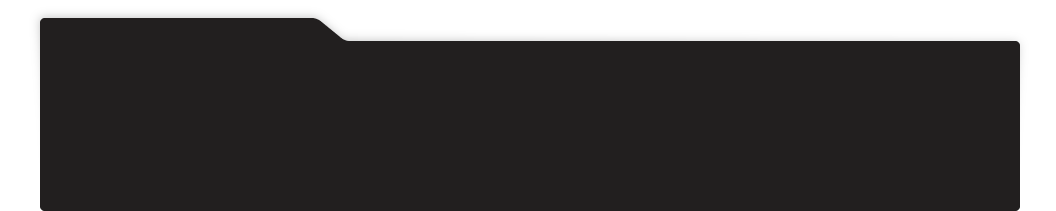
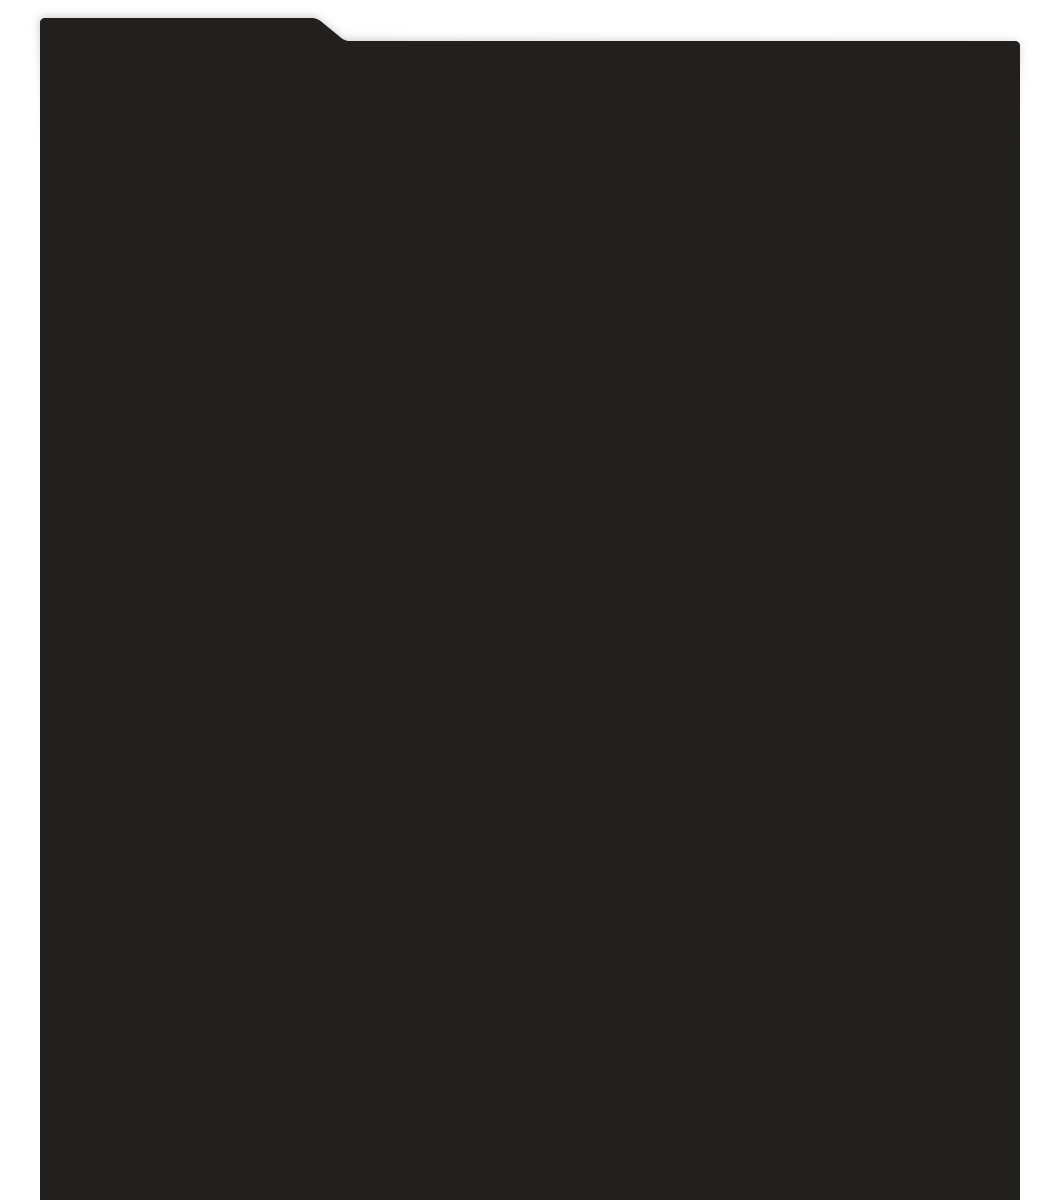
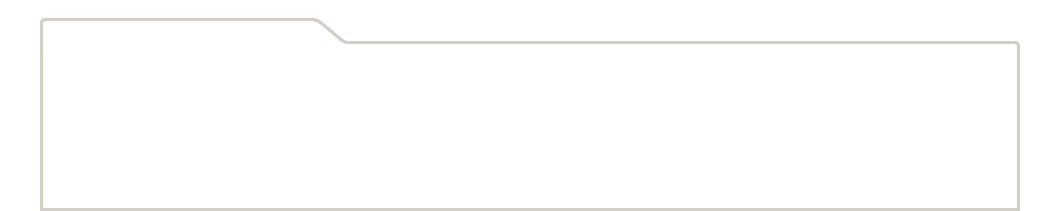
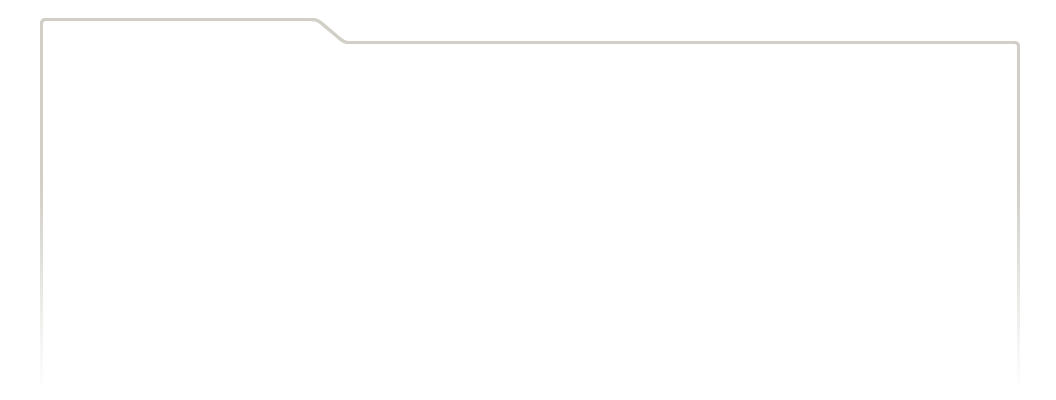
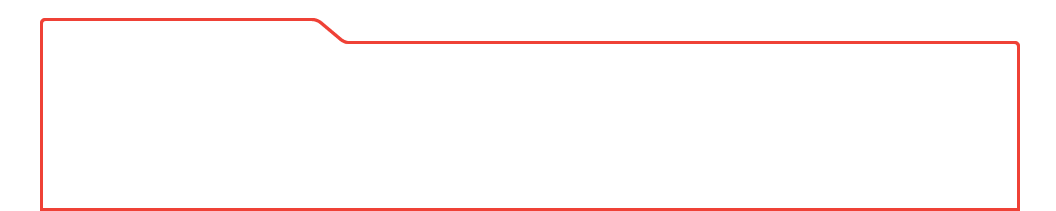
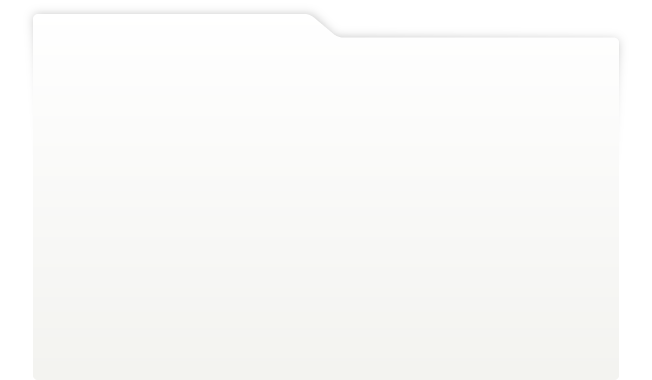
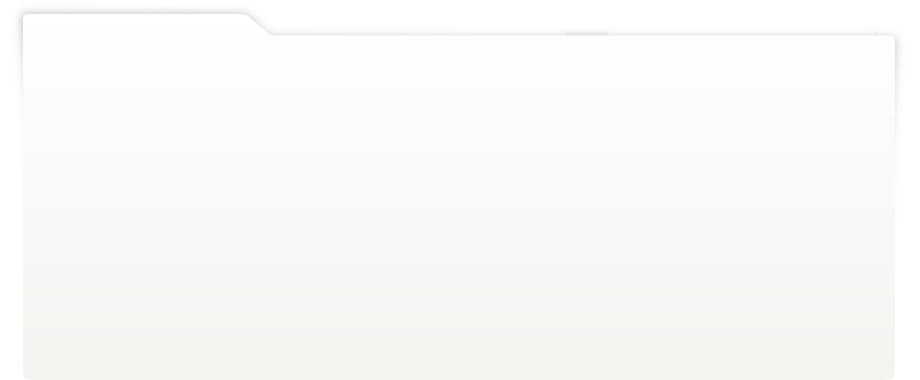
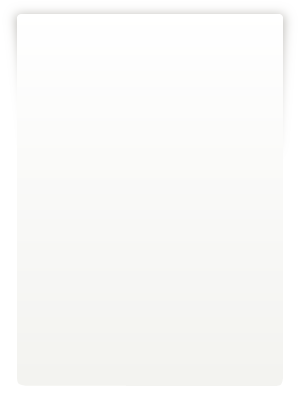
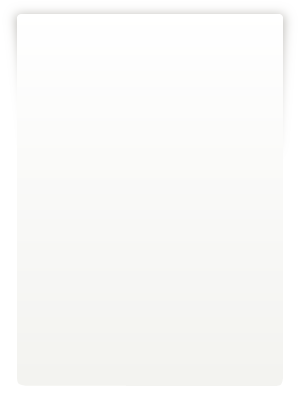
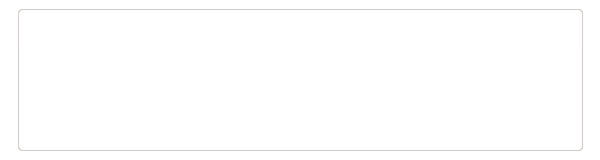
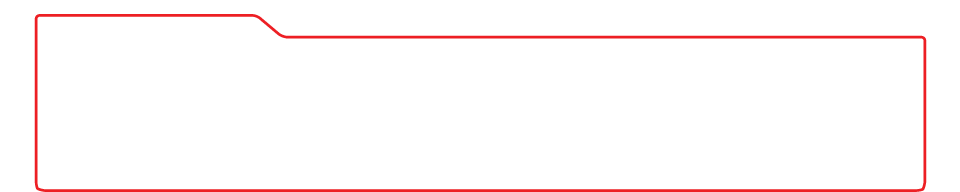
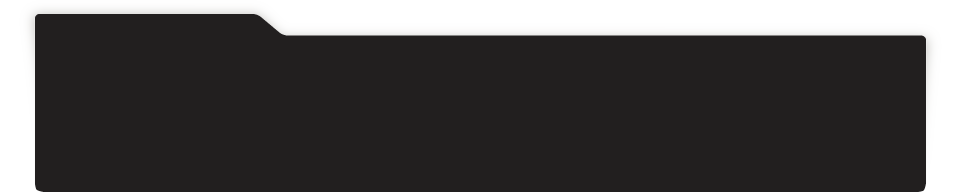
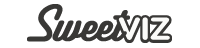
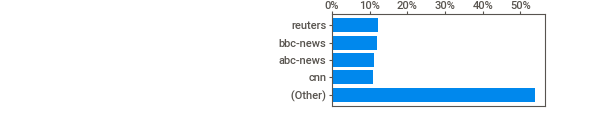
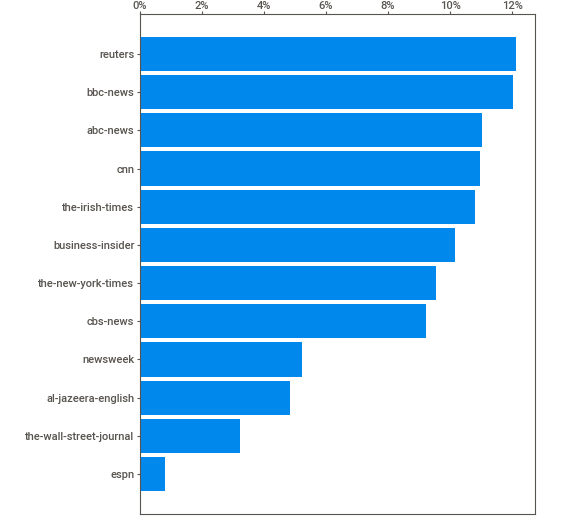
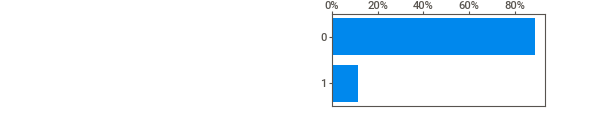
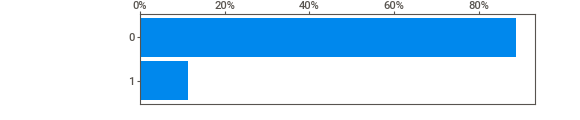
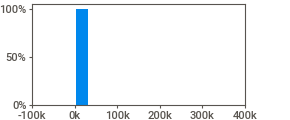
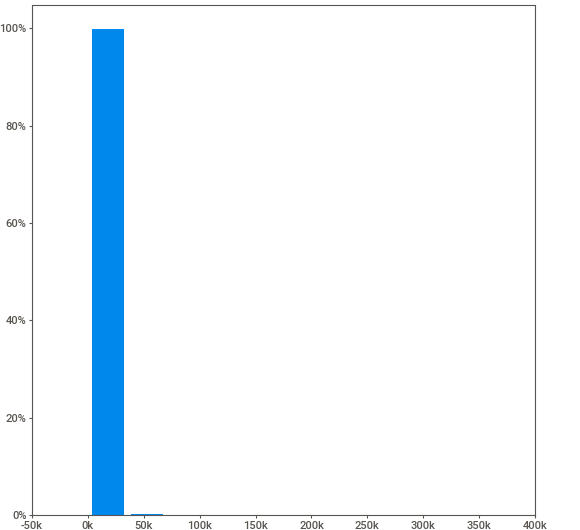
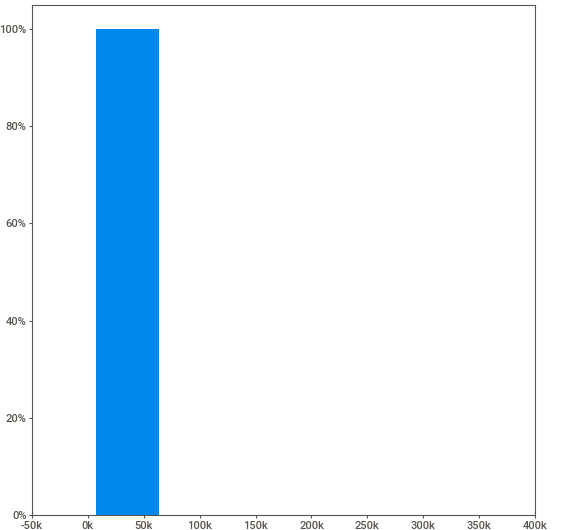
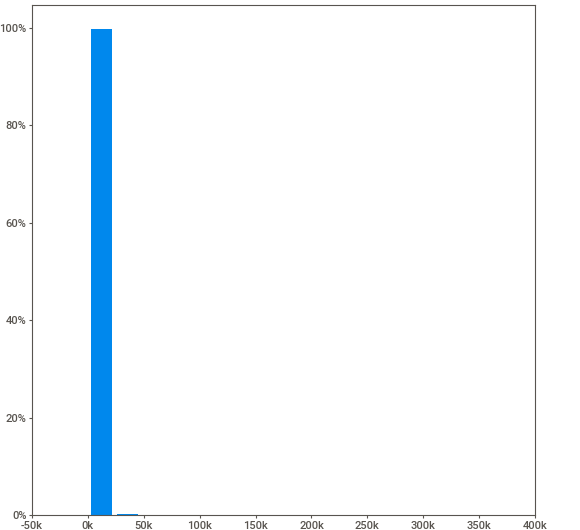
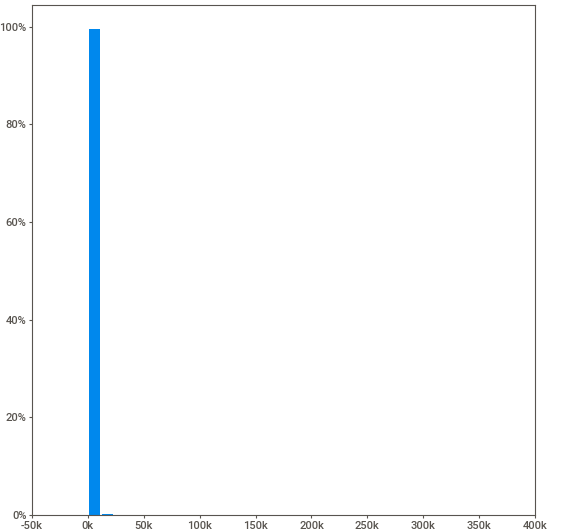
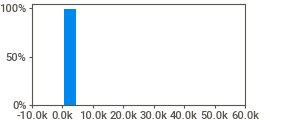
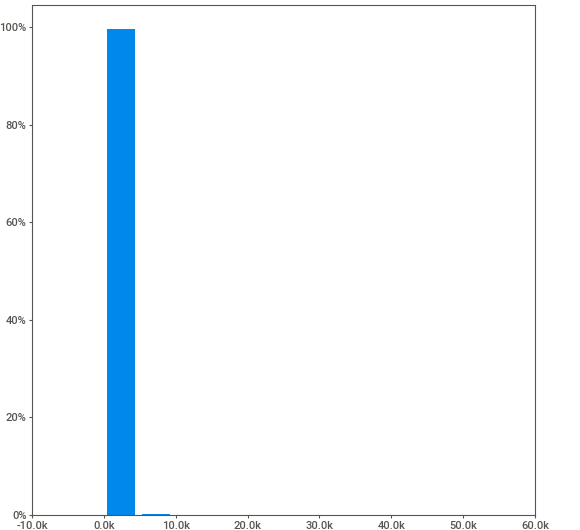
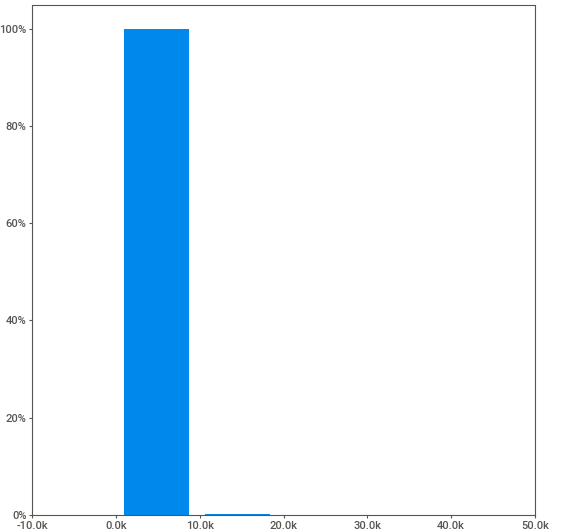
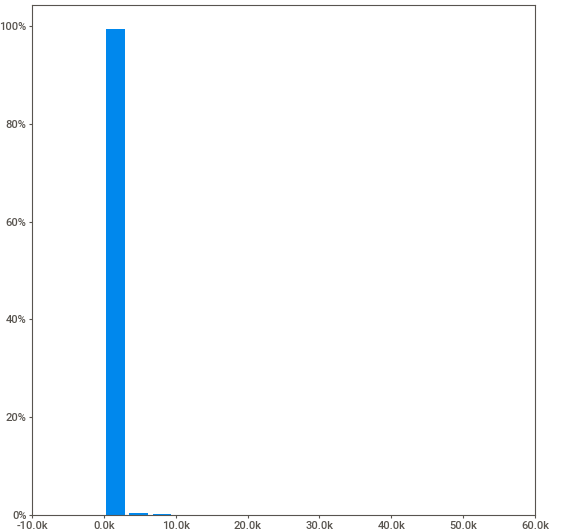
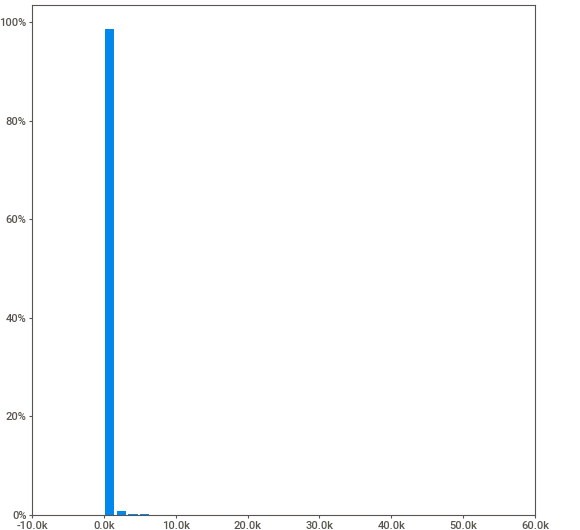
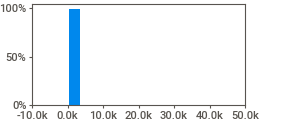
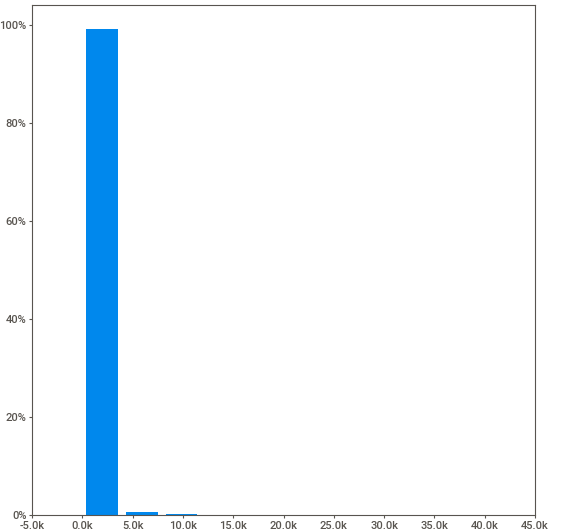
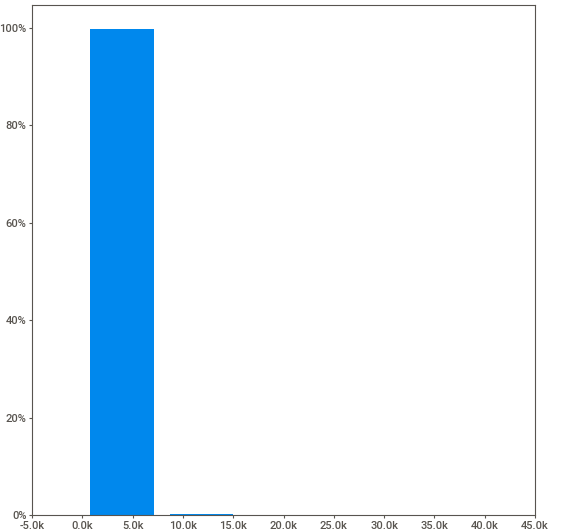
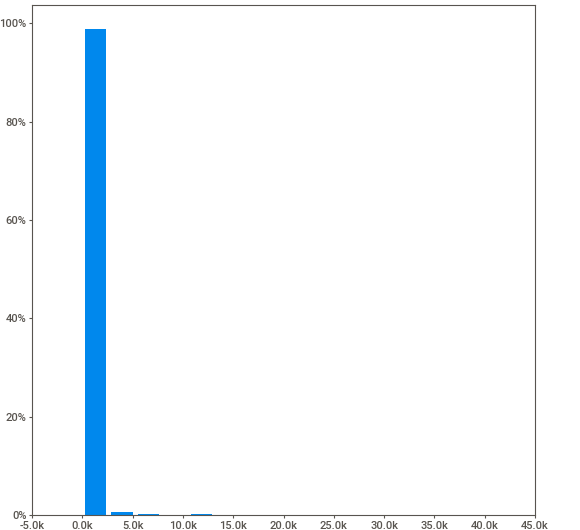
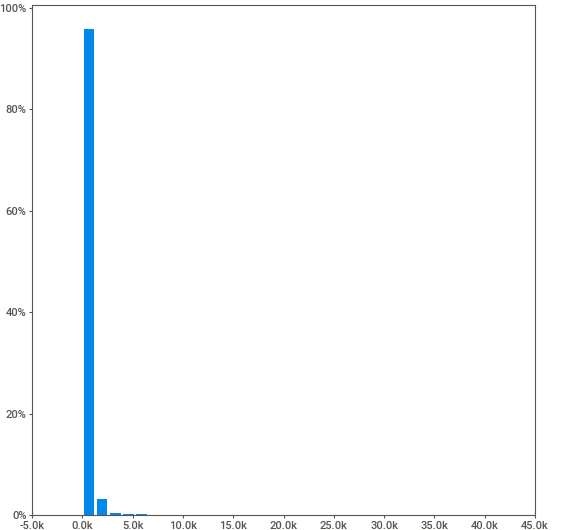
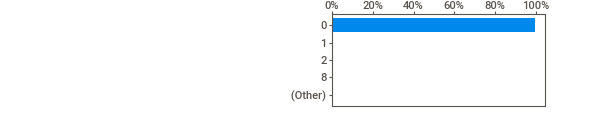
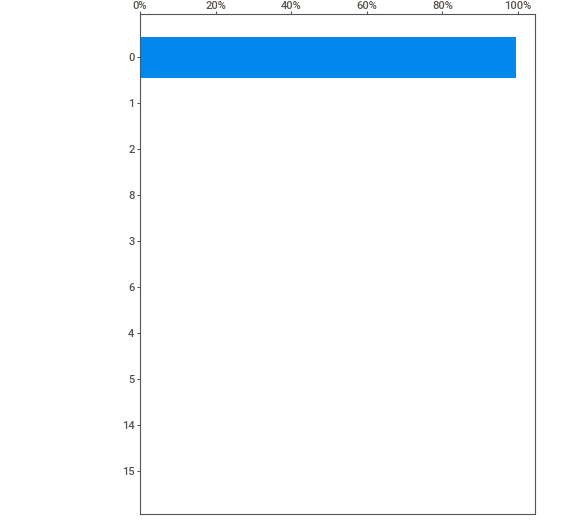
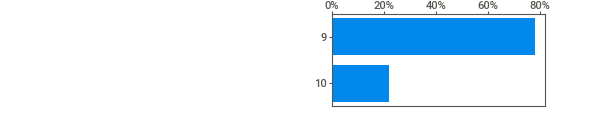
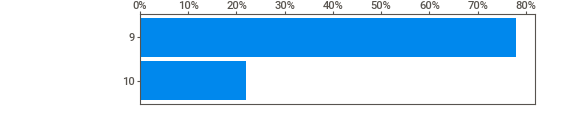
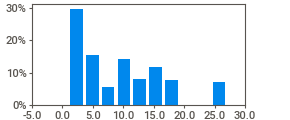
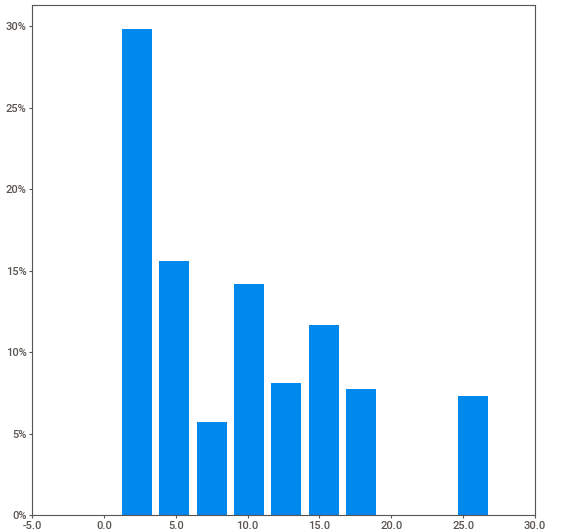
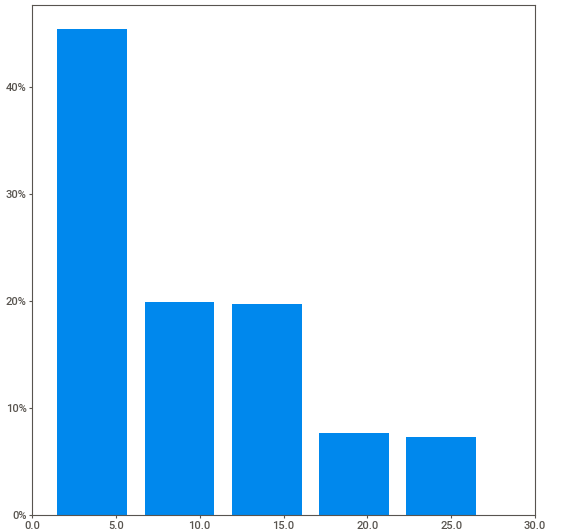
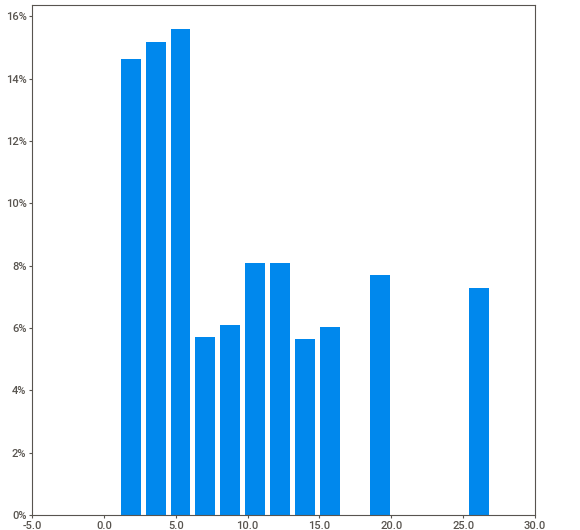
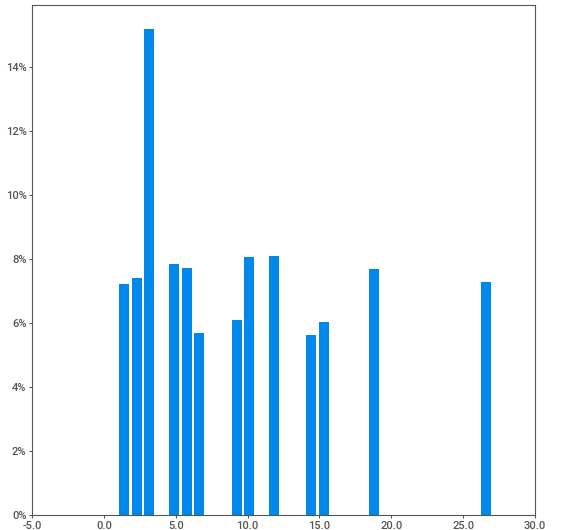
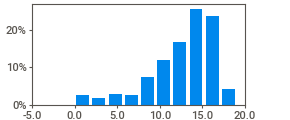
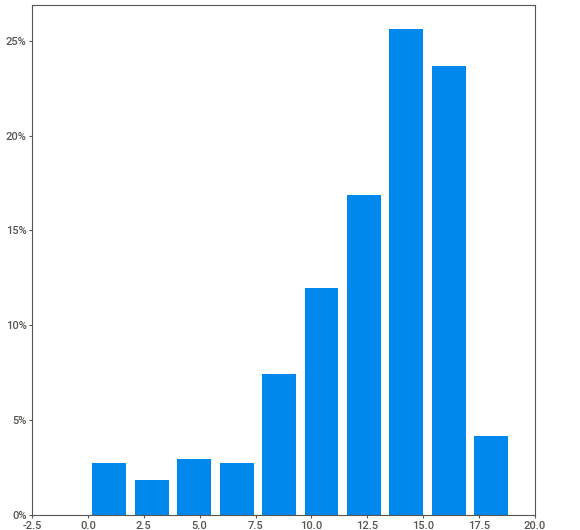
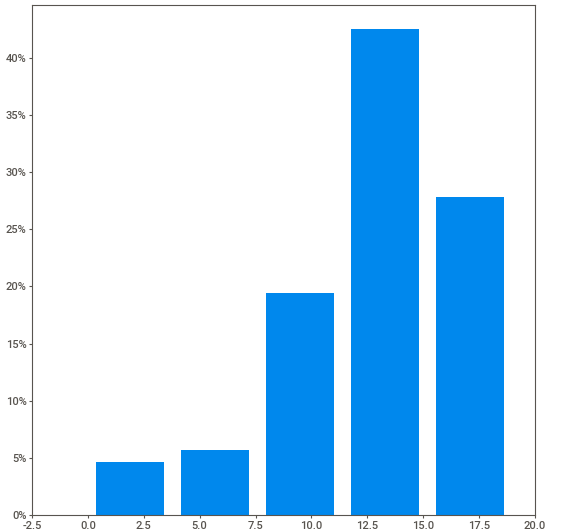
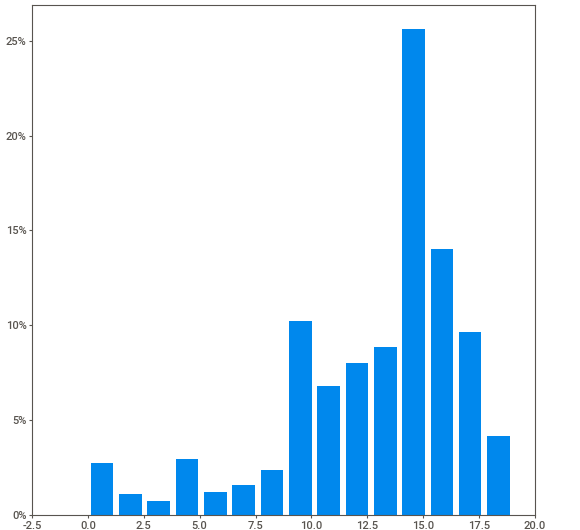
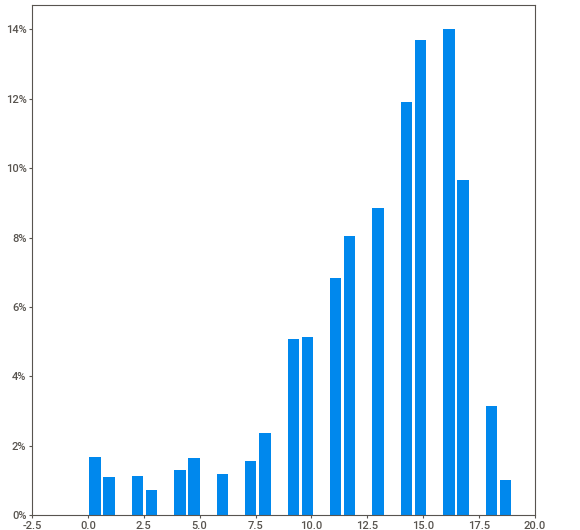
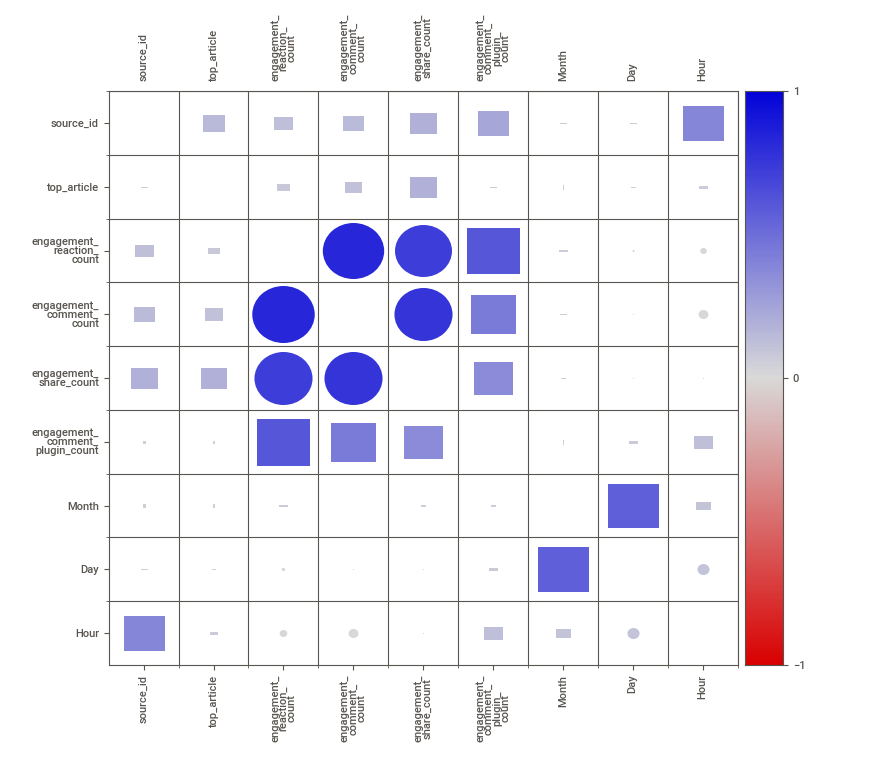
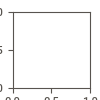

In [12]:
# we will begin with sweetviz, a python library which can automate most of the exploration task bypublishing a report as seen below
! pip install sweetviz
import sweetviz as sv
report=sv.analyze(df)
report.show_notebook()

The sweetviz EDA report helps us infer the aforementioned insights:
1. There are 11 features in the dataset where 4 are categorical, 5 numerical and 2 text based.
2. There are 12 distinct sources of articles where Reuters, BBC , ABC and CNN have the most publications. ESPn has the least.
3. Title and Description need to be cleaned (which we will do ahead!) as there are a lot of numbers, punctuations etc.
4. Dataset is highly imbalnced when talking about top article count as 89% are just normal articles.Also, it is not correlated 
to any attribute as seen in the association tab.
5. All the engagment metrics are extremely left skewed where 0 is the dominant value as seen below:
    1. Reaction count ranges from 0 (46%) to 345k (<0.1%)
    2. Comment count ranges from 0 (56%) to 48490 (<0.1%)
    3. Share count ranges from 0 (24%) to 48490 (<0.1%)
    Also, share count was highly correlated with reaction and comment count as people ususlly react to text they like or relate to
    and ultimately might reshare it.
6. Most of the articles were published in september (78%) as compared to November (22%)
7. Most articles get published between 10 and 17 hrs.

Lets drill down using seaborrn library!!

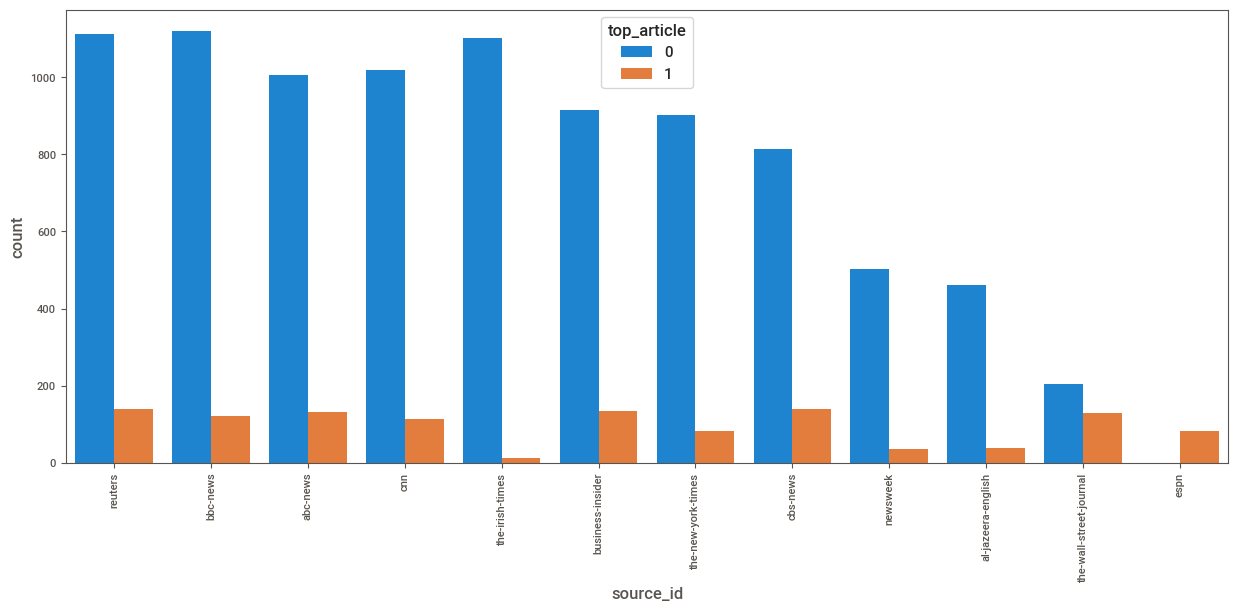

In [52]:
# see the top article distribution across the sources.

plt.figure(figsize=(15,6)) 
sns.countplot(data=df,x='source_id',hue='top_article',order = df['source_id'].value_counts().index)
plt.xticks(rotation=90);

All sources have small proportions of top articles but Irish times and Newsweek have very low as compared to others.
ESPN has all its articles rated as top ones whereas The wall street journal has fair balance of articles in both categories. 

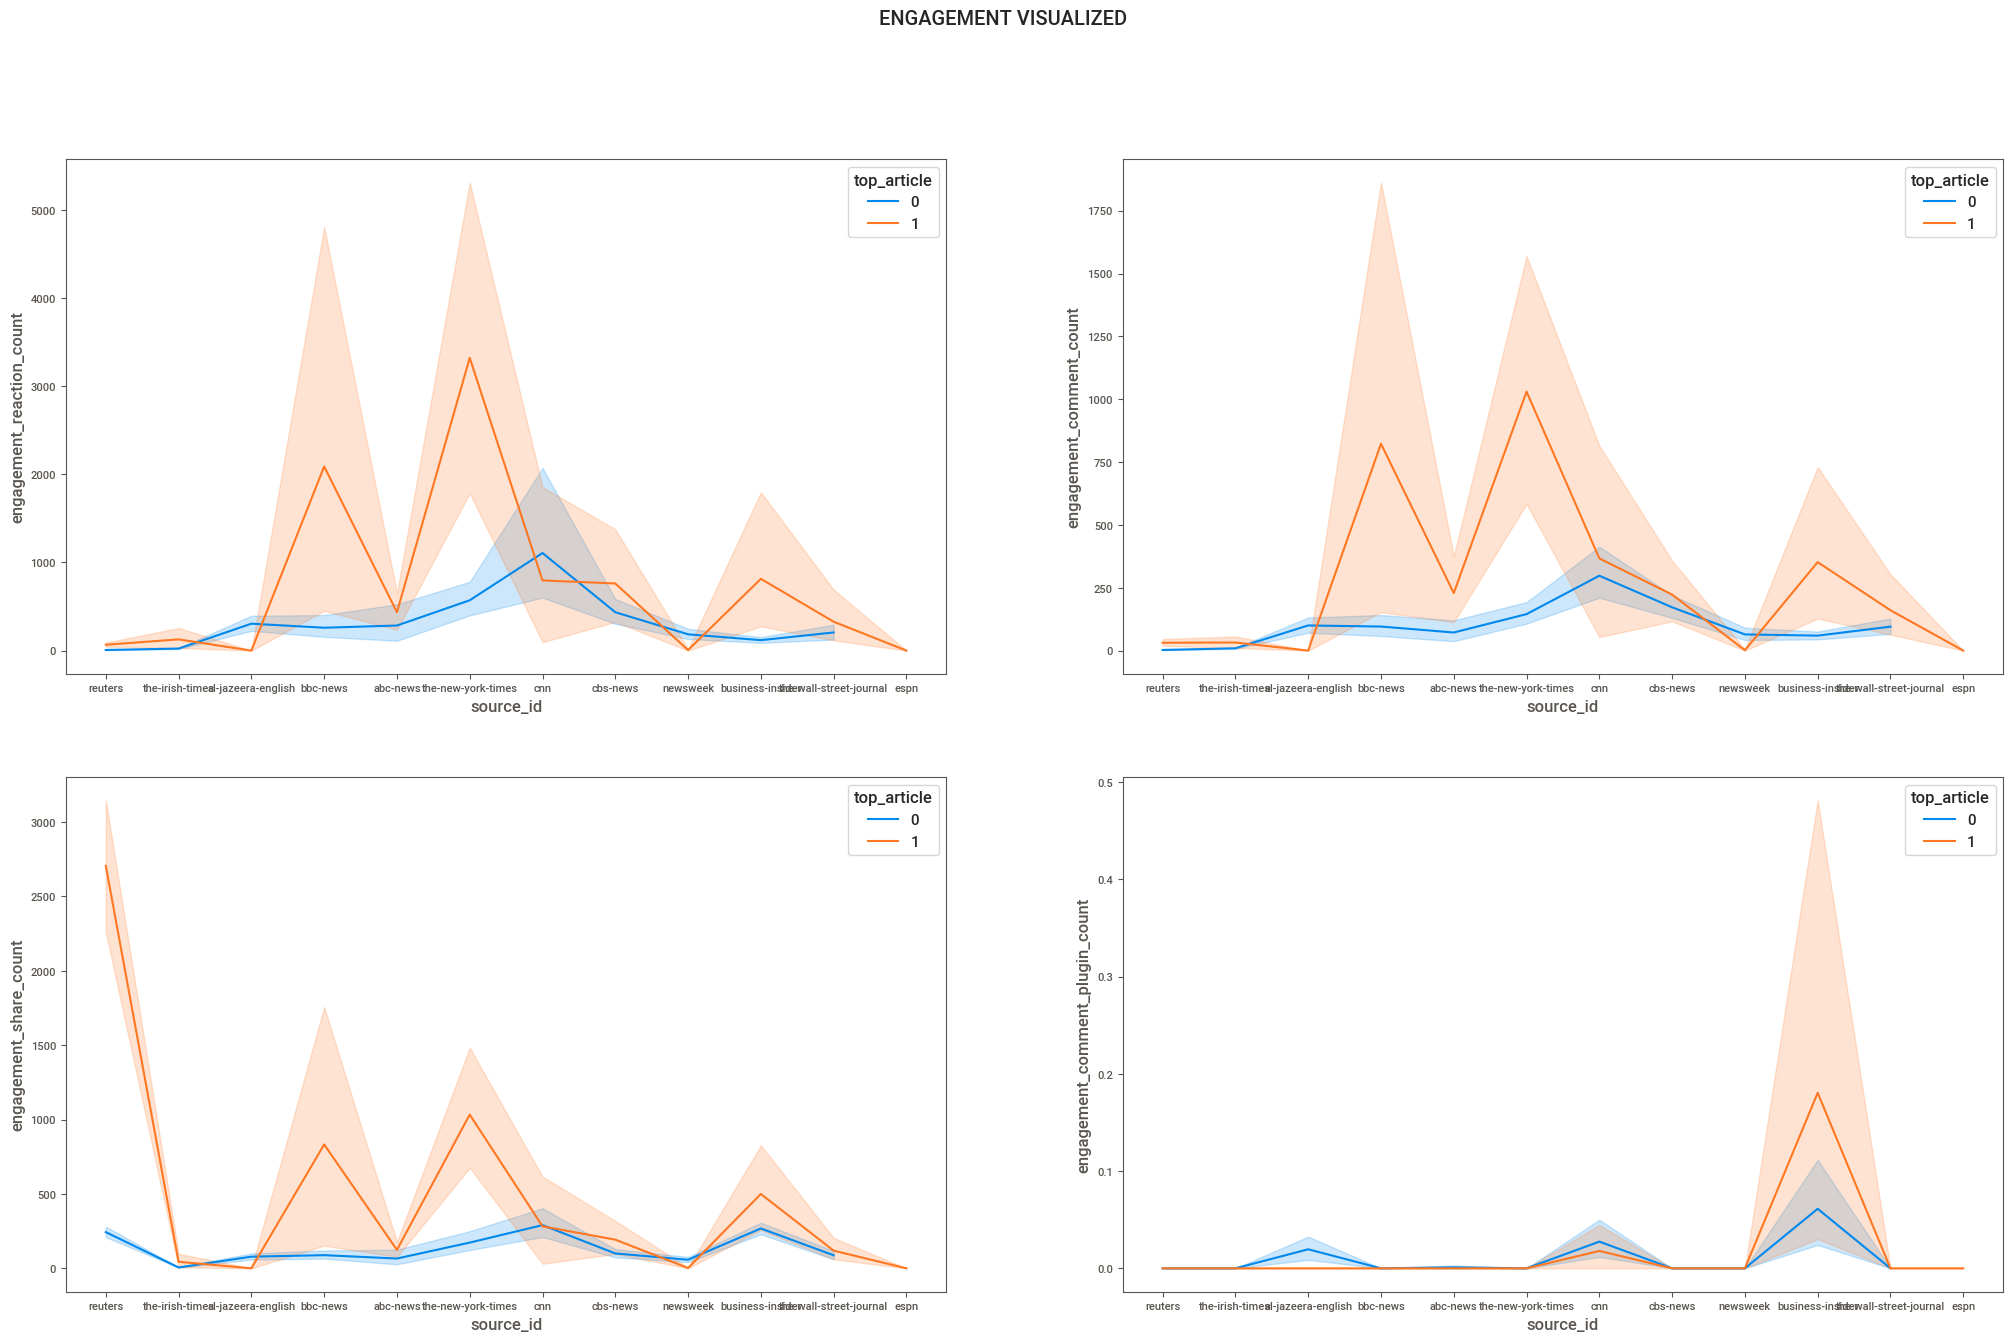

In [53]:
# see the engagment trends for top and other articles across sources

fig, axes = plt.subplots(2, 2, figsize=(25, 15))
plt.suptitle('ENGAGEMENT VISUALIZED')
sns.lineplot(data=df, x="source_id", y="engagement_reaction_count",ax=axes[0,0],hue='top_article')
sns.lineplot(data=df, x="source_id", y="engagement_comment_count",ax=axes[0,1],hue='top_article')
sns.lineplot(data=df, x="source_id", y="engagement_share_count",ax=axes[1,0],hue='top_article')
sns.lineplot(data=df, x="source_id", y="engagement_comment_plugin_count",ax=axes[1,1],hue='top_article')
plt.show()

The enagement metrics for normal articles shows uniform behvior across resources, that is low engagment. For top articles, 
a drastic enegagment hike is seen for BBC, The New York Times and Business Insider.Also, Reuter's top articles are the most shared
across all sources. This implies that certain newspapers are more popularly read/circulated as compared to others.

It's time for some TEXT ANALYTICS !!

In [54]:
#load important nltk packages
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/repl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/repl/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [55]:
#Natural Language Cleaning and Processing
import re
import string

# start cleaning numbers substitute by " "
df['title']=[re.sub('\d',"",i) for i in df['title']] # regex for numbers
df['description']=[re.sub('\d',"",i) for i in df['description']]

# start cleaning special characters substitute by white space
df['title']=[re.sub('[%s]' % re.escape(string.punctuation),' ',i) for i in df['title']]
df['description']=[re.sub('[%s]' % re.escape(string.punctuation),' ',i) for i in df['description']]

# start making lowercase
df['title']=[i.lower() for i in df['title']]
df['description']=[i.lower() for i in df['description']]

#create new column of words as tokens 
df['title_tokens']=[nltk.word_tokenize(i) for i in df['title']]
df['description_tokens']=[nltk.word_tokenize(i) for i in df['description']]

# remove stopwords from tokens
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
df['title_tokens']=[[i for i in j if not i in stop_words] for j in df['title_tokens']]
df['description_tokens']=[[i for i in j if not i in stop_words] for j in df['description_tokens']]

# lemmatisation
def lemmatize_text(text):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]
df['lemma_title'] = df.title_tokens.apply(lemmatize_text)
df['lemma_description'] = df.description_tokens.apply(lemmatize_text)

#join the lemmas
df['lemma_title']=df['lemma_title'].apply(lambda x:  ' '.join(x))
df['lemma_description']=df['lemma_description'].apply(lambda x:  ' '.join(x))

df.head()

,source_id,title,description,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,Month,Day,Hour,title_tokens,description_tokens,lemma_title,lemma_description
0,reuters,ntsb says autopilot engaged in california tes...,the national transportation safety board said ...,0,0,0,2528,0,9,3,16,"[ntsb, says, autopilot, engaged, california, t...","[national, transportation, safety, board, said...",ntsb say autopilot engaged california tesla crash,national transportation safety board said tues...
1,the-irish-times,unemployment falls to post crash low of,latest monthly figures reflect continued growt...,0,6,10,2,0,9,3,10,"[unemployment, falls, post, crash, low]","[latest, monthly, figures, reflect, continued,...",unemployment fall post crash low,latest monthly figure reflect continued growth...
3,al-jazeera-english,north korean footballer han joins italian gian...,han is the first north korean player in the se...,0,0,0,7,0,9,3,17,"[north, korean, footballer, han, joins, italia...","[han, first, north, korean, player, serie, pra...",north korean footballer han join italian giant...,han first north korean player serie praised ap...
4,bbc-news,uk government lawyer says proroguing parliamen...,the uk government s lawyer david johnston arg...,0,0,0,0,0,9,3,14,"[uk, government, lawyer, says, proroguing, par...","[uk, government, lawyer, david, johnston, argu...",uk government lawyer say proroguing parliament...,uk government lawyer david johnston argued pro...
5,abc-news,this tender land is an affecting story about...,this tender land by william kent krueger is ...,0,0,0,0,0,9,3,15,"[tender, land, affecting, story, growing]","[tender, land, william, kent, krueger, affecti...",tender land affecting story growing,tender land william kent krueger affecting sto...


Now we will make WORDCLOUDS !

  Using cached wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)
  Using cached Pillow-8.3.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (3.0 MB)
  Using cached numpy-1.21.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.8 MB)
  Using cached matplotlib-3.4.3-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
tensorflow 2.4.1 requires six~=1.15.0, but you have six 1.16.0 which 

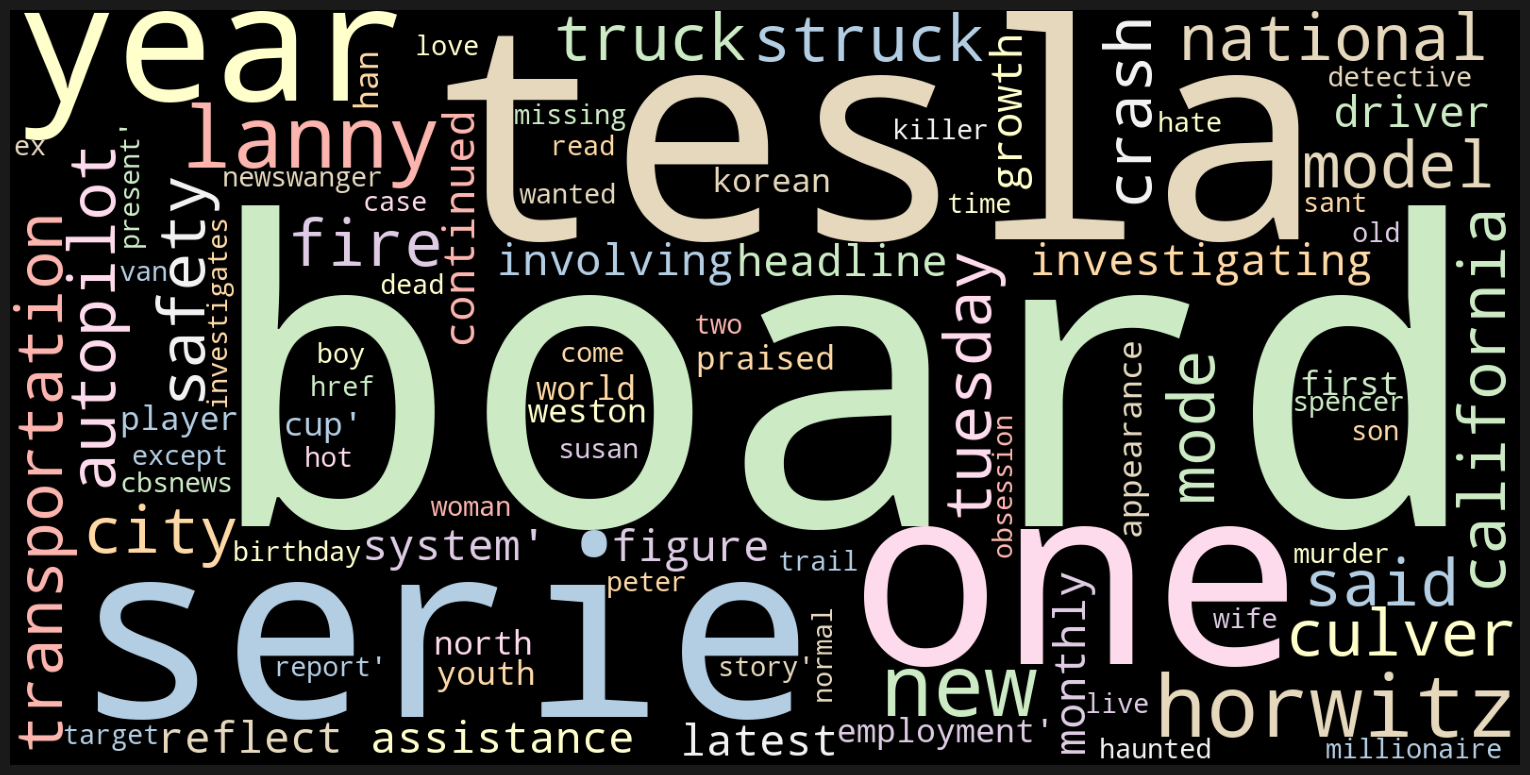

In [56]:
# making wordcloud for the description attribute
!pip install wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
text = df['lemma_description'].values 

wordcloud = WordCloud(width=1600, height=800,background_color='black', colormap='Pastel1',collocations=False).generate(str(text))
plt.figure( figsize=(20,10), facecolor='k');
plt.imshow(wordcloud);
#plt.figsize(15,10);
plt.axis("off");
plt.show()

WORDCLOUD helps us visualize the magnitude at which some prominent words occur across the news description, more the size of 
a certain, higher occurence it had.


Now, we can also visulize the text in terms of ngrams.

Text(0.5, 0, 'Occurences')

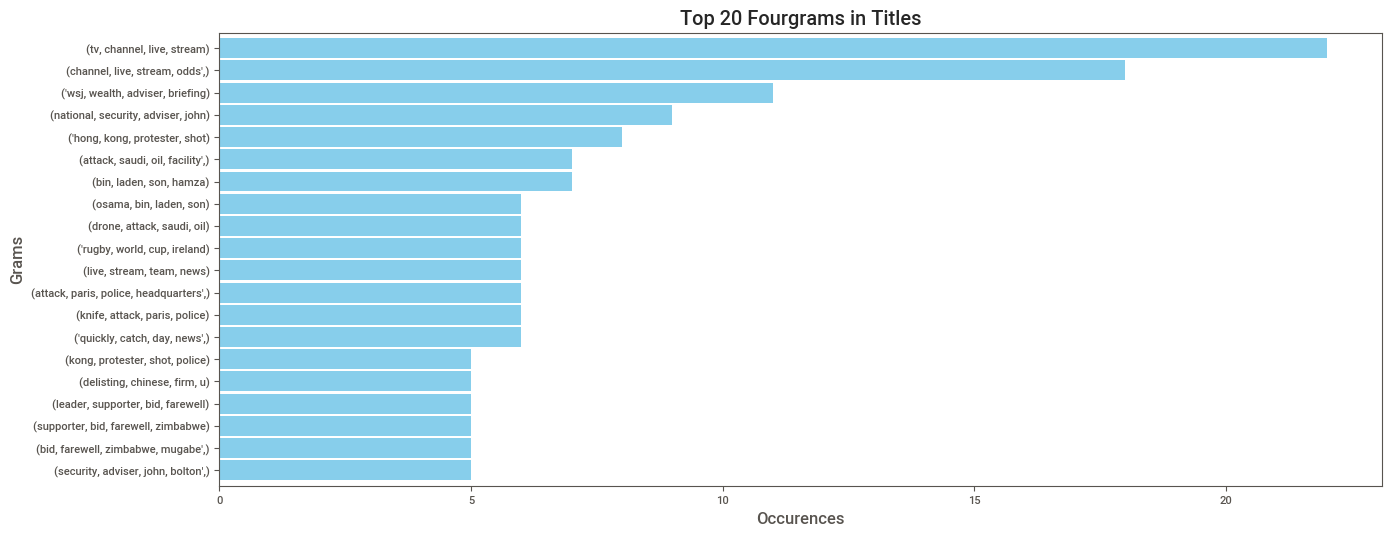

In [57]:
# make ngrams of 4 from title
words_desc=(''.join(str(df['lemma_title'].tolist()))).split(' ')
grams=(pd.Series(nltk.ngrams(words_desc, 4)).value_counts())[:20]
grams.sort_values().plot.barh(color='skyblue', width=.9, figsize=(15, 6))
plt.title('Top 20 Fourgrams in Titles')
plt.ylabel('Grams')
plt.xlabel('Occurences')

It is evident that the words (tv,channel, live, stream) in that order occured the most in the article titles.
Similarly see the ngrams of the description attribute.

Text(0.5, 0, 'Occurences')

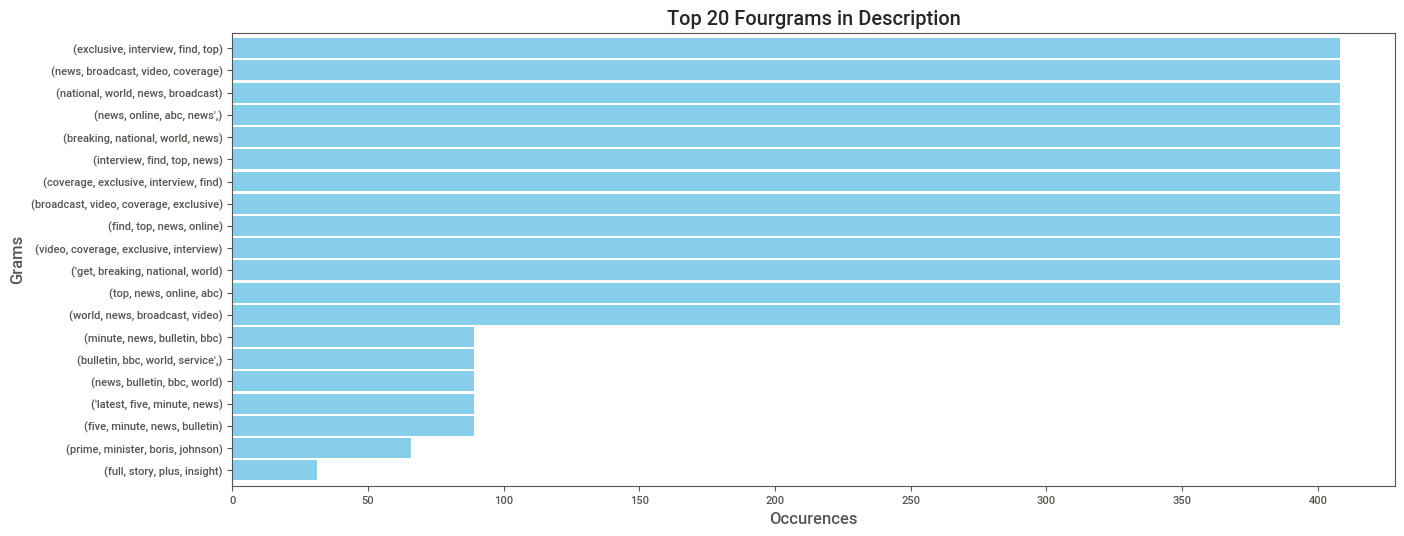

In [58]:
# make ngrams of 4 from description
words_desc=(''.join(str(df['lemma_description'].tolist()))).split(' ')
grams=(pd.Series(nltk.ngrams(words_desc, 4)).value_counts())[:20]
grams.sort_values().plot.barh(color='skyblue', width=.9, figsize=(15, 6))
plt.title('Top 20 Fourgrams in Description')
plt.ylabel('Grams')
plt.xlabel('Occurences')

Now, its time to get into sentiment analytics. We will use VADER LEXICON. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the 
[MIT License]

In [59]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer() # initiate vader sentiment analyzer

# apply the analyzer to description and obtain scores
df['scores']=df['description'].apply(lambda review: sid.polarity_scores(review)) 
df['compound']=df['scores'].apply(lambda score_dict: score_dict['compound'])


#finaly fetch sentiment from compound score based on condition as stated
# i will only consider negative and positive bifurcation here, for ease of analysis
df['sentiment']=df['compound'].apply(lambda score: 'pos' if score >0 else 'neg')
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/repl/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,source_id,title,description,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,Month,Day,Hour,title_tokens,description_tokens,lemma_title,lemma_description,scores,compound,sentiment
0,reuters,ntsb says autopilot engaged in california tes...,the national transportation safety board said ...,0,0,0,2528,0,9,3,16,"[ntsb, says, autopilot, engaged, california, t...","[national, transportation, safety, board, said...",ntsb say autopilot engaged california tesla crash,national transportation safety board said tues...,"{'neg': 0.109, 'neu': 0.821, 'pos': 0.07, 'com...",-0.1531,neg
1,the-irish-times,unemployment falls to post crash low of,latest monthly figures reflect continued growt...,0,6,10,2,0,9,3,10,"[unemployment, falls, post, crash, low]","[latest, monthly, figures, reflect, continued,...",unemployment fall post crash low,latest monthly figure reflect continued growth...,"{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp...",0.3818,pos
3,al-jazeera-english,north korean footballer han joins italian gian...,han is the first north korean player in the se...,0,0,0,7,0,9,3,17,"[north, korean, footballer, han, joins, italia...","[han, first, north, korean, player, serie, pra...",north korean footballer han join italian giant...,han first north korean player serie praised ap...,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",0.4939,pos
4,bbc-news,uk government lawyer says proroguing parliamen...,the uk government s lawyer david johnston arg...,0,0,0,0,0,9,3,14,"[uk, government, lawyer, says, proroguing, par...","[uk, government, lawyer, david, johnston, argu...",uk government lawyer say proroguing parliament...,uk government lawyer david johnston argued pro...,"{'neg': 0.092, 'neu': 0.812, 'pos': 0.096, 'co...",-0.2263,neg
5,abc-news,this tender land is an affecting story about...,this tender land by william kent krueger is ...,0,0,0,0,0,9,3,15,"[tender, land, affecting, story, growing]","[tender, land, william, kent, krueger, affecti...",tender land affecting story growing,tender land william kent krueger affecting sto...,"{'neg': 0.398, 'neu': 0.557, 'pos': 0.045, 'co...",-0.9360,neg


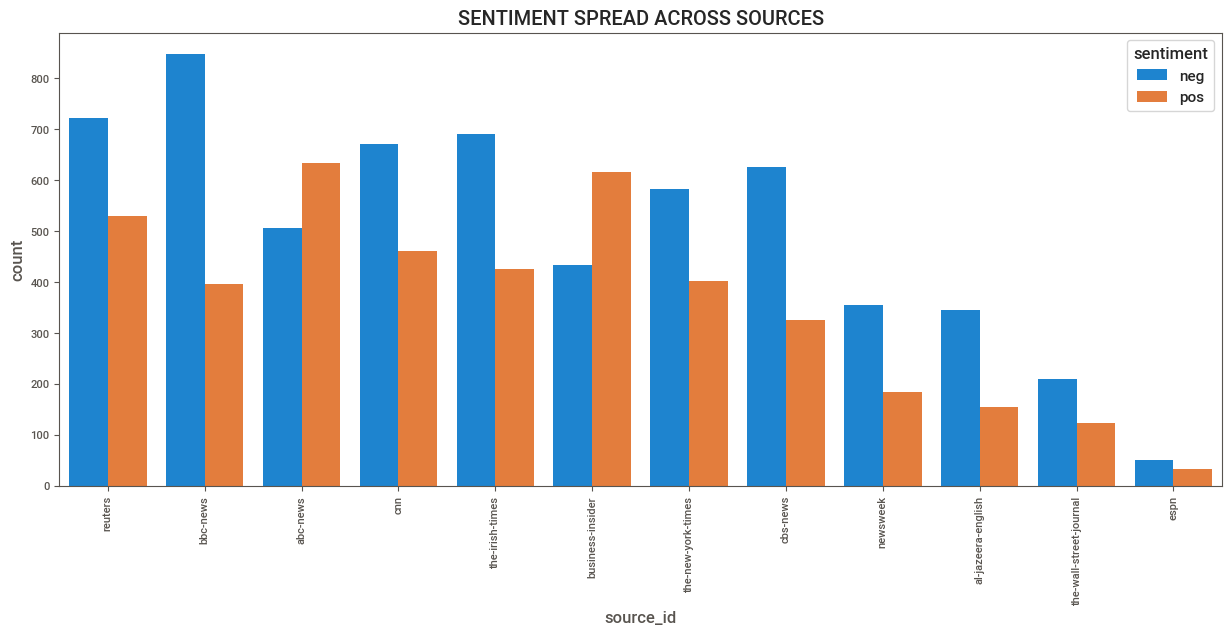

In [60]:
# Now visualize the spread of negative and positive sentiment articles across the news sources
plt.figure(figsize=(15,6)) 
sns.countplot(data=df,x='source_id',hue='sentiment',order = df['source_id'].value_counts().index)
plt.title("SENTIMENT SPREAD ACROSS SOURCES")
plt.xticks(rotation=90);

It seems all of the news sources except ABC and Bussiness Insider have higher articles with negative sentiments.

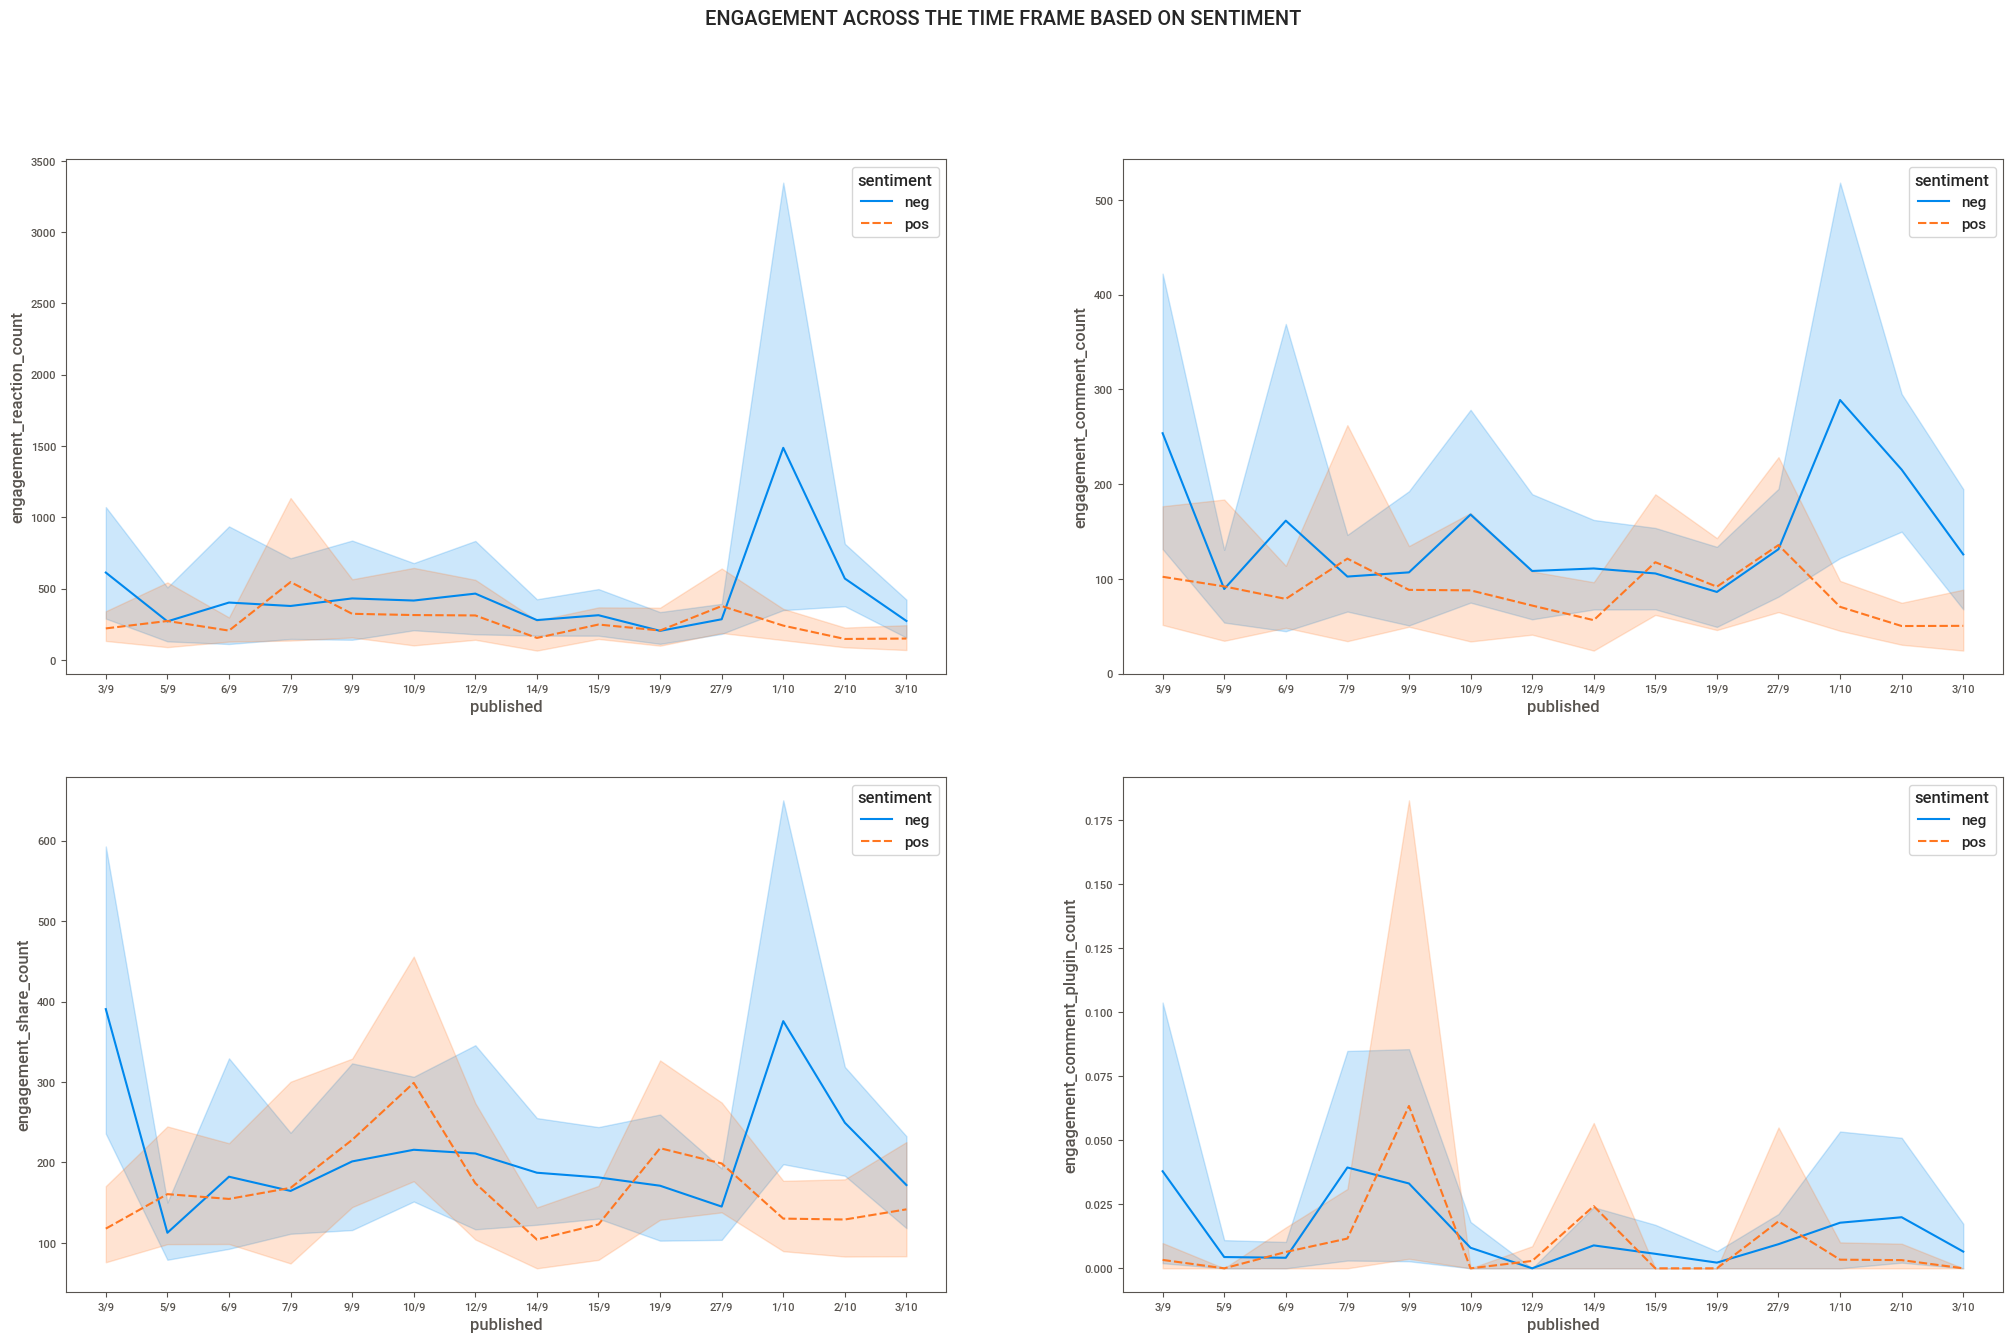

In [61]:
# now we will explore more by drilling down to publishing day and month of an article.
# concat day and month in new attribute published
df['published'] = df['Day'].map(str) + '/' +df['Month'].map(str)

fig, axes = plt.subplots(2, 2, figsize=(25, 15))
plt.suptitle("ENGAGEMENT ACROSS THE TIME FRAME BASED ON SENTIMENT")
sns.lineplot(data=df, x="published", y="engagement_reaction_count",ax=axes[0,0],hue='sentiment',style='sentiment')
sns.lineplot(data=df, x="published", y="engagement_comment_count",ax=axes[0,1],hue='sentiment',style='sentiment')
sns.lineplot(data=df, x="published", y="engagement_share_count",ax=axes[1,0],hue='sentiment',style='sentiment')
sns.lineplot(data=df, x="published", y="engagement_comment_plugin_count",ax=axes[1,1],hue='sentiment',style='sentiment')
plt.show();

Predominantly, negative articles were found reacted and commented upon. INTERESTING !!

Now lets check the distribution of our enagagement metrics.

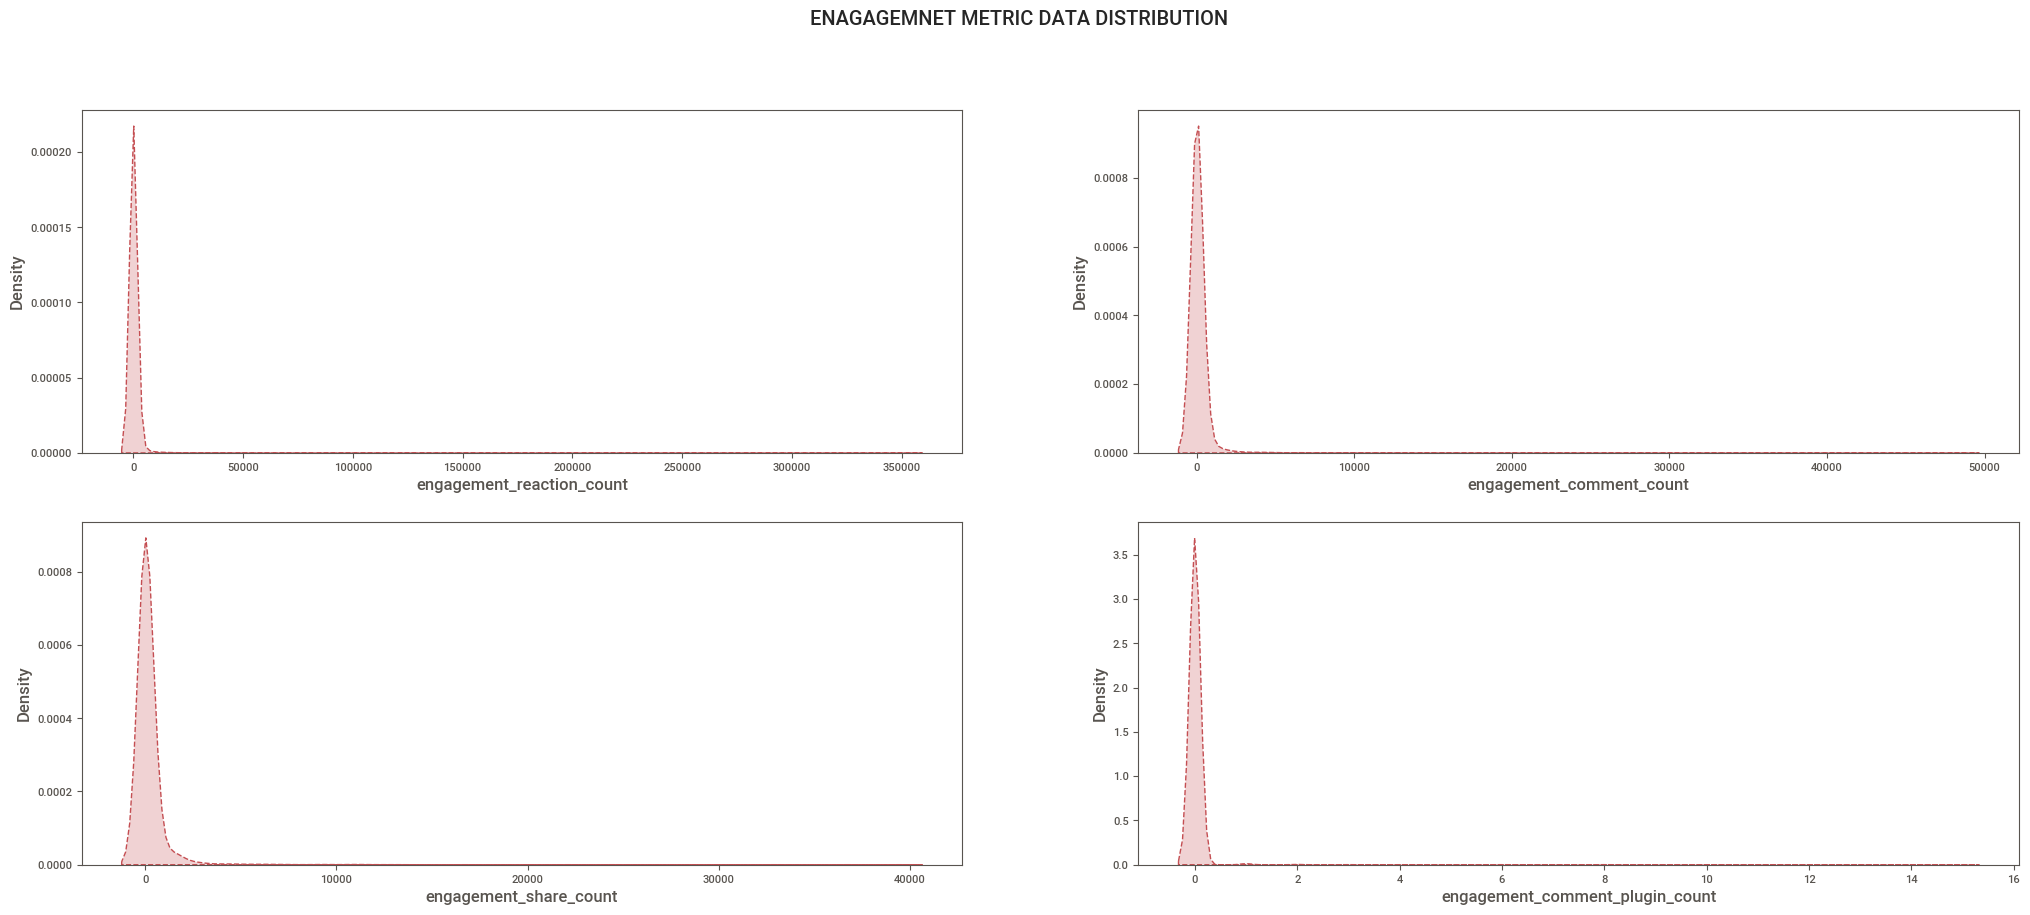

In [62]:
# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.
i=1
fig, axes = plt.subplots(2, 2, figsize=(25, 10))
plt.suptitle('ENAGAGEMNET METRIC DATA DISTRIBUTION')
for column in df[['engagement_reaction_count','engagement_comment_count','engagement_share_count','engagement_comment_plugin_count']]:    
    plt.subplot(2,2,i)
    sns.kdeplot(data=df[column], bw = 0.4, label = "Top_article", shade=True, color="r", linestyle="--")
    #plt.title(column, fontsize=12)
    i = i + 1
plt.show();

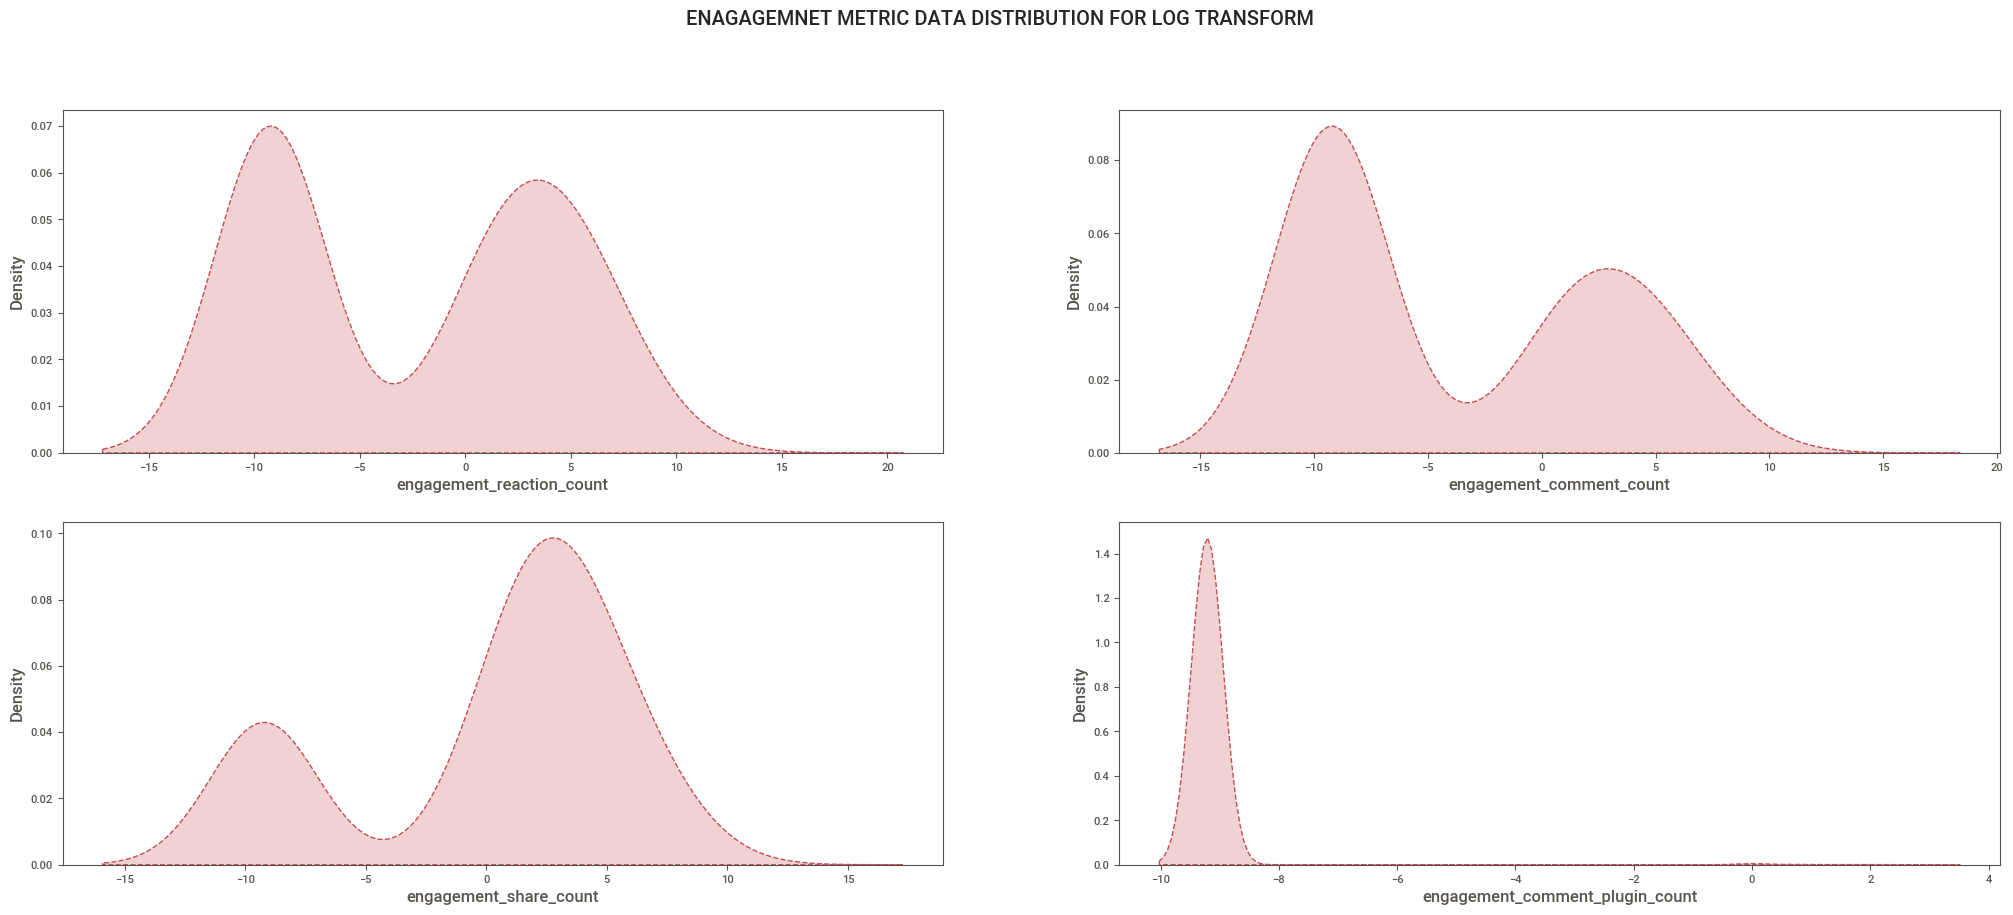

In [63]:
# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.
i=1
fig, axes = plt.subplots(2, 2, figsize=(25, 10))
plt.suptitle('ENAGAGEMNET METRIC DATA DISTRIBUTION FOR LOG TRANSFORM')
for column in df[['engagement_reaction_count','engagement_comment_count','engagement_share_count','engagement_comment_plugin_count']]:    
    plt.subplot(2,2,i)
    sns.kdeplot(data=np.log(df[column]+0.0001), bw = 0.4, label = "Top_article", shade=True, color="r", linestyle="--")
    #plt.title(column, fontsize=12)
    i = i + 1
plt.show();

Log transformed engagemnt metrics are better distributed as compared to initial skewed onse.

## 5. Developing Machine Learning Models

On the final step we will try to explore the machine learning models which can help us classify articles on the basis of 
1. Whether an article with given text has positive or negative SENTIMENT.
2. Whether an article with given text is a TOP ARTICLE.

In [64]:
# import machine learning libararies and generate test train split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer # for text analytics, bag of words
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

train_x, test_x, train_y, test_y = train_test_split(df['lemma_description'],df['sentiment'],test_size=0.3, random_state=42)
tfidf = TfidfVectorizer(stop_words='english') 
tfidf.fit(train_x)
# transformation
train_x_tfidf=tfidf.transform(train_x)
test_x_tfidf=tfidf.transform(test_x)

I will consider 4 models here, Logistic Regression, Decision tree classifier , Multinomial Naive Bayes and Support Vector Machine.

1. Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical 
dependent variable. In logistic regression, the dependent variable is a binary variable.

2. Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from 
the data features.

3. Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP).
The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article.

4. Supprt Vector helps to achieve hyper plane clasiification

In [65]:
# fit the models
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(train_x_tfidf,train_y)

from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier(max_depth=50,random_state=42)
dt.fit(train_x_tfidf,train_y)

from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_x_tfidf,train_y)

from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=42)
svc.fit(train_x_tfidf,train_y)


LinearSVC(random_state=42)

Now we will PUBLISH REPORT for each of the model using confusion matrix and classification metrics as follows.

			-------MODEL COMPARISONS FOR CLASSIFYING SENTIMENTS-------

		-----LOGISTIC REGRESSION------
              precision    recall  f1-score   support

         neg       0.78      0.94      0.85      1855
         pos       0.86      0.60      0.71      1241

    accuracy                           0.80      3096
   macro avg       0.82      0.77      0.78      3096
weighted avg       0.81      0.80      0.79      3096



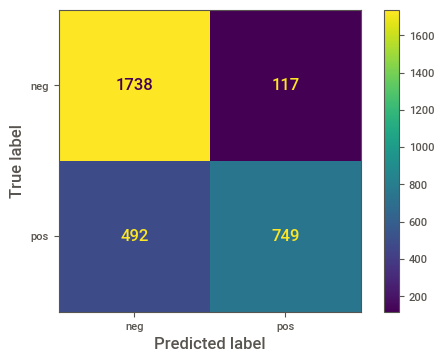

In [66]:
from sklearn.metrics import plot_confusion_matrix, classification_report

def report(model):
    preds=model.predict(test_x_tfidf)
    print(classification_report(test_y, preds))
    print(plot_confusion_matrix(model,test_x_tfidf,test_y))

print("\t\t\t-------MODEL COMPARISONS FOR CLASSIFYING SENTIMENTS-------\n")

print("\t\t-----LOGISTIC REGRESSION------")
report(lr)

		-----DECISION TREE CLASSIFIER------
              precision    recall  f1-score   support

         neg       0.75      0.93      0.83      1855
         pos       0.83      0.54      0.65      1241

    accuracy                           0.77      3096
   macro avg       0.79      0.73      0.74      3096
weighted avg       0.78      0.77      0.76      3096



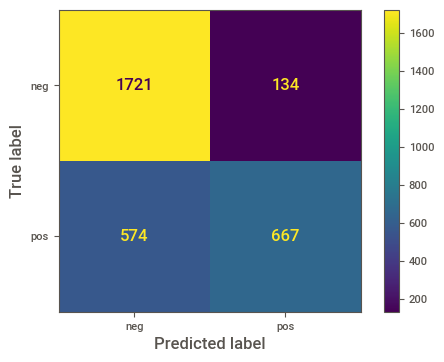

In [67]:
print("\t\t-----DECISION TREE CLASSIFIER------")
report(dt)

		------MULTINOMIAL NAIVE BAYE'S-----
              precision    recall  f1-score   support

         neg       0.73      0.94      0.82      1855
         pos       0.85      0.49      0.62      1241

    accuracy                           0.76      3096
   macro avg       0.79      0.72      0.72      3096
weighted avg       0.78      0.76      0.74      3096



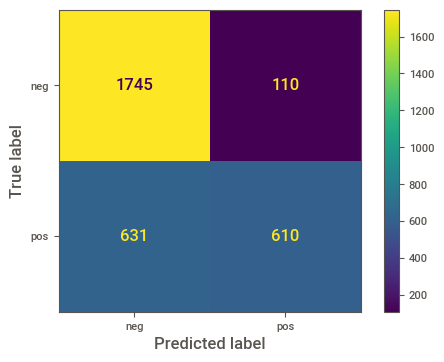

In [68]:
print("\t\t------MULTINOMIAL NAIVE BAYE'S-----")
report(nb)

		------SUPPORT VECTOR MACHINE------
              precision    recall  f1-score   support

         neg       0.83      0.88      0.85      1855
         pos       0.80      0.74      0.77      1241

    accuracy                           0.82      3096
   macro avg       0.82      0.81      0.81      3096
weighted avg       0.82      0.82      0.82      3096



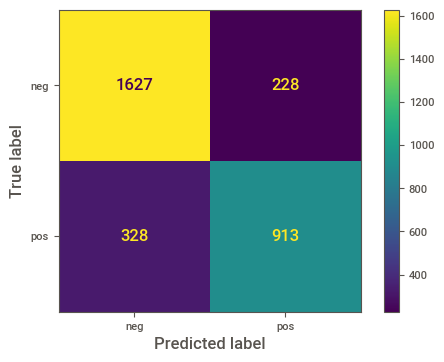

In [69]:
print("\t\t------SUPPORT VECTOR MACHINE------")
report(svc)

## After comparing the models, clearly Support Vector Machines outperformed all the models in terms of F1 SCORE and ACCURRACY.
Thus, now we will fit a pipeline and check for some random text to verify the model.

In [70]:
from sklearn.pipeline import Pipeline

pipe=Pipeline([('tfidf',TfidfVectorizer()),('lr',LogisticRegression())])
pipe.fit(df['description'],df['sentiment'])
new_text=['The economy collapsed']
pipe.predict(new_text)

array(['neg'], dtype=object)

Yes the model could identify that the unseen text indeed was a negative news material.
Now we will try to predict the article status as top or normal based on the text.

An important thing to analyze here is that the class is IMBALANCED to perform classification task. So first we will under sample 
the prominent class (0) with class 1.

In [71]:
# for top_article prediction
top_article=df[df['top_article']==1]
normal_article=df[df['top_article']==0]

print("Data points in top article: ",top_article.shape)
print("Data points in normal article: ",normal_article.shape)


Data points in top article:  (1158, 19)
Data points in normal article:  (9161, 19)


In [72]:
# undersampling normal class to make it compareable to top_article
normal_article_undersample = normal_article.sample(1000)

# concatenating top_article and normal_article_undersample in new dataframe
undersample_df=pd.concat([top_article,normal_article_undersample])

			-------MODEL COMPARISONS FOR CLASSIFYING SENTIMENTS-------

		-----LOGISTIC REGRESSION------
              precision    recall  f1-score   support

           0       0.49      0.52      0.50       291
           1       0.59      0.56      0.57       357

    accuracy                           0.54       648
   macro avg       0.54      0.54      0.54       648
weighted avg       0.54      0.54      0.54       648



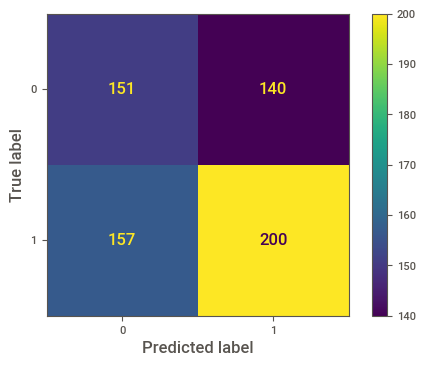

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
x=vec.fit_transform(undersample_df['lemma_description'])
y=undersample_df['top_article'].values
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=42)


# fit models
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(train_x,train_y)

from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier(max_depth=50,random_state=42)
dt.fit(train_x,train_y)

from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_x,train_y)

from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=42)
svc.fit(train_x,train_y)

def report(model):
    preds=model.predict(test_x)
    print(classification_report(test_y, preds))
    print(plot_confusion_matrix(model,test_x,test_y))

print("\t\t\t-------MODEL COMPARISONS FOR CLASSIFYING SENTIMENTS-------\n")

print("\t\t-----LOGISTIC REGRESSION------")
report(lr)

		-----DECISION TREE CLASSIFIER------
              precision    recall  f1-score   support

           0       0.48      0.34      0.40       291
           1       0.56      0.70      0.62       357

    accuracy                           0.54       648
   macro avg       0.52      0.52      0.51       648
weighted avg       0.53      0.54      0.52       648



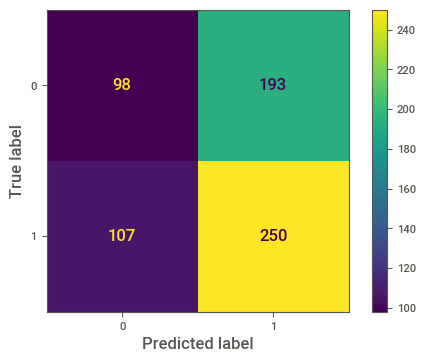

In [74]:
print("\t\t-----DECISION TREE CLASSIFIER------")
report(dt)

		------MULTINOMIAL NAIVE BAYE'S-----
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       291
           1       0.61      0.59      0.60       357

    accuracy                           0.57       648
   macro avg       0.57      0.57      0.57       648
weighted avg       0.57      0.57      0.57       648



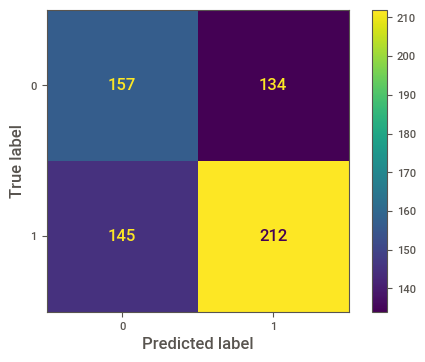

In [75]:
print("\t\t------MULTINOMIAL NAIVE BAYE'S-----")
report(nb)

		------SUPPORT VECTOR MACHINE------
              precision    recall  f1-score   support

           0       0.49      0.53      0.51       291
           1       0.59      0.55      0.57       357

    accuracy                           0.54       648
   macro avg       0.54      0.54      0.54       648
weighted avg       0.55      0.54      0.54       648



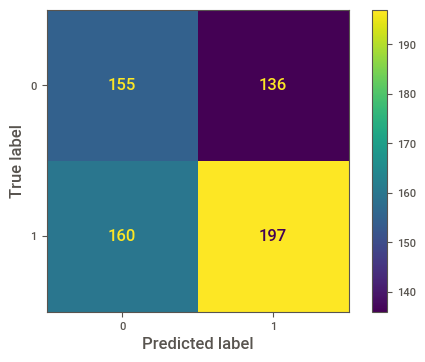

In [76]:
print("\t\t------SUPPORT VECTOR MACHINE------")
report(svc)

## After comparing the models, clearly Multinomial Naive Baye's outperformed all the models in terms of F1 SCORE and ACCURRACY.
## If undersampling was not done the class would have classified most of the articles as normal due to biased learnings.

## 6. Conclusion

SUPPORT VECTOR MACHINE delivered best results for classifying article sentiments and MULTINOMIAL NAIVE BAYE'S was better for 
classifying article as top performing or normal. However,even after undersampling, the models are not good enough as they lack learning due to presence of just around 1100 top performin articles in this huge dataset. Thus, the models will improve if we can train them on some more top article text.

## 7. Suggested Future Works

Text analytics has high potential to uncover structured and quantifiable insights from large volumes of unstructured textual data.
Following future works can be suggested:
    
1. Gaining live deep insights into what types of readings are more engaging for readers.
2. Improving quality of publishing .
3. Sentiment analysis to mine reader opinion t0 improve business.
4. Gauging reading trends to identify issues